### Importing needed libraries and reading the dataset

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, classification_report
import graphviz
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import pydotplus
from IPython.display import Image
from pretty_confusion_matrix import pp_matrix
from pretty_confusion_matrix import pp_matrix_from_data
import plotly.express as px
from sklearn.svm import SVC
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from plotly.offline import plot
from sklearn.ensemble import VotingClassifier
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart.csv')
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [382]:
df.shape

(253680, 22)

### Removing the duplicates (if there are any) and rechecking the dataset shape

In [383]:
df = df.drop_duplicates()

In [384]:
df.shape

(229781, 22)

### As we can see there were more than 30,000 duplicates

|

In [385]:
df.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         229781.000000  229781.000000  229781.000000  229781.000000   
mean               0.103216       0.454441       0.441760       0.959535   
std                0.304241       0.497921       0.496598       0.197047   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke       Diabetes  \
count  229781.00000  229781.000000  229781.000000  229781.000000   
mean       28.68567       0.465661       0.044756       0.325627   
std         6.78636       0.498821       0.206767       0.724623   
min        12.00000       0.000000       0.000000       0.000000   
25%        24.00000       0.000000       0.000000       0.000000   
50%        27.00000       0.000000       0.000000       0.000000   
75%        32.00000       1.000000       0.000000       0.000000   
max        98.00000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  229781.000000  229781.000000  ...  229781.000000  229781.000000   
mean        0.733355       0.612966  ...       0.946075       0.092810   
std         0.442206       0.487073  ...       0.225871       0.290167   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        2.601151       3.505373       4.675178       0.185507   
std         1.064685       7.713725       9.046568       0.388709   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       4.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  229781.000000  229781.000000  229781.000000  229781.000000  
mean        0.439231       8.086582       4.980568       5.890383  
std         0.496295       3.093809       0.992895       2.092477  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       6.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   Diabetes              229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [387]:
df.isnull().sum().sum()

0

### Converting the Age column values to age ranges for easier and more understandable visualizations

In [388]:
df.sort_values(by=["Age"], inplace = True)
df['Age']=df['Age'].replace([1, 2, 3, 4,5,6,7,8,9,10,11,12,13], ['18~24','25~29','30~34','35~39','40~44','45~49','50~54','55~59','60~64','65~69'
                                               ,'70~74','75~79','80+'])
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
123466                   0.0     0.0       0.0        1.0  32.0     0.0   
92598                    0.0     0.0       0.0        1.0  18.0     1.0   
200558                   0.0     0.0       0.0        1.0  27.0     1.0   
200561                   0.0     0.0       0.0        1.0  28.0     0.0   
17977                    0.0     0.0       0.0        1.0  20.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
83318                    1.0     1.0       0.0        0.0  24.0     1.0   
217137                   0.0     0.0       1.0        1.0  29.0     1.0   
21440                    0.0     1.0       0.0        1.0  21.0     0.0   
83292                    0.0     0.0       0.0        1.0  27.0     1.0   
31229                    0.0     1.0       0.0        1.0  21.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
123466     0.0       0.0           1.0     1.0  ...            1.0   
92598      0.0       0.0           1.0     1.0  ...            1.0   
200558     0.0       0.0           1.0     1.0  ...            0.0   
200561     0.0       0.0           1.0     0.0  ...            1.0   
17977      0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
83318      0.0       0.0           0.0     1.0  ...            1.0   
217137     0.0       0.0           1.0     1.0  ...            1.0   
21440      0.0       0.0           1.0     1.0  ...            1.0   
83292      0.0       2.0           0.0     0.0  ...            1.0   
31229      0.0       0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex    Age  \
123466          0.0      2.0       0.0       0.0       0.0  1.0  18~24   
92598           0.0      3.0       0.0      30.0       1.0  0.0  18~24   
200558          0.0      1.0      21.0       0.0       0.0  1.0  18~24   
200561          0.0      3.0      10.0       5.0       1.0  0.0  18~24   
17977           0.0      1.0       2.0       0.0       0.0  0.0  18~24   
...             ...      ...       ...       ...       ...  ...    ...   
83318           0.0      5.0       0.0      30.0       1.0  0.0    80+   
217137          0.0      2.0       0.0       0.0       0.0  1.0    80+   
21440           0.0      2.0       1.0       0.0       0.0  0.0    80+   
83292           0.0      2.0       0.0       0.0       0.0  1.0    80+   
31229           0.0      2.0       0.0       6.0       0.0  0.0    80+   

        Education Income  
123466        4.0    1.0  
92598         5.0    7.0  
200558        3.0    1.0  
200561        6.0    7.0  
17977         6.0    7.0  
...           ...    ...  
83318         6.0    4.0  
217137        5.0    5.0  
21440         6.0    7.0  
83292         6.0    8.0  
31229         4.0    5.0  

[229781 rows x 22 columns]

### Visualizing the heart disease or attack chance based on age

In [389]:
agedf = df[['Age', 'HeartDiseaseorAttack']].groupby('Age')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
agedf['Heart Disease or Attack Chance'] = round(agedf[1] / (agedf[0] + agedf[1]) * 100, 1)
agedf['Age'] = np.unique(np.array(df['Age']))

In [390]:
fig=px.bar(agedf, x='Age', y='Heart Disease or Attack Chance')
fig.show()

### Clealrly there is an obvious direct correlation between the chance of a heart disease/attack and the age 

### The previous graph made me question if the sex would make any difference in the chance of getting heart disease/attack, so I plotted a graph to show the correlation between age, sex and the heart disease or attack chance

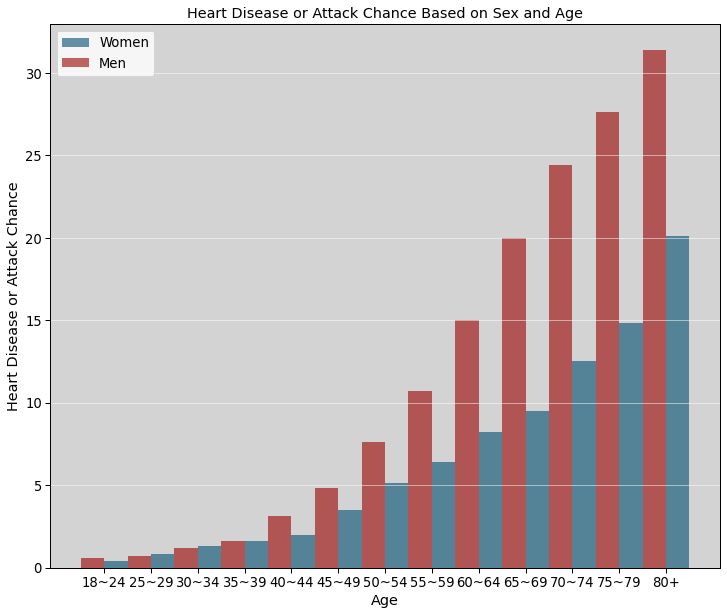

In [391]:
t = np.unique(np.array(df['Age']))
x = np.arange(len(t))

#Calculating the Heart Disease or Attack Chance for males
mendf = df.copy()
mendf.drop(mendf[mendf['Sex'] == 0].index, inplace = True)
mdf = mendf[['Age', 'HeartDiseaseorAttack']].groupby('Age')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
mdf['Heart Disease or Attack Chance'] = round(mdf[1] / (mdf[0] + mdf[1]) * 100, 1)

#Calculating the Heart Disease or Attack Chance for females
womendf = df.copy()
womendf.drop(womendf[womendf['Sex'] == 1].index, inplace = True)
wdf = womendf[['Age', 'HeartDiseaseorAttack']].groupby('Age')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
wdf['Heart Disease or Attack Chance'] = round(wdf[1] / (wdf[0] + wdf[1]) * 100, 1)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plt.bar(x+0.25, wdf['Heart Disease or Attack Chance'], 0.5, label='Women', alpha=0.6, color='#004c70')
plt.bar(x-0.25, mdf['Heart Disease or Attack Chance'], 0.5, label='Men', alpha=0.6, color='#990000')
plt.xticks(x,t)
sns.set_context("paper", font_scale=1.5)
plt.xlabel("Age")
plt.ylabel("Heart Disease or Attack Chance")
plt.title("Heart Disease or Attack Chance Based on Sex and Age")
ax.set_facecolor('lightgrey')
plt.legend()
plt.grid(color = 'white', axis = 'y', linewidth = 0.5)
plt.show()

### Surprisingly men tend to have much higher chances for heart diseases / attacks than women especially after 40 years old 

|

|

### We all know the famous quote "An apple a day keeps the doctor away", so let's validate it by checking if the chance of getting heart diseases or attacks will decrease by eating fruits and vegetables 

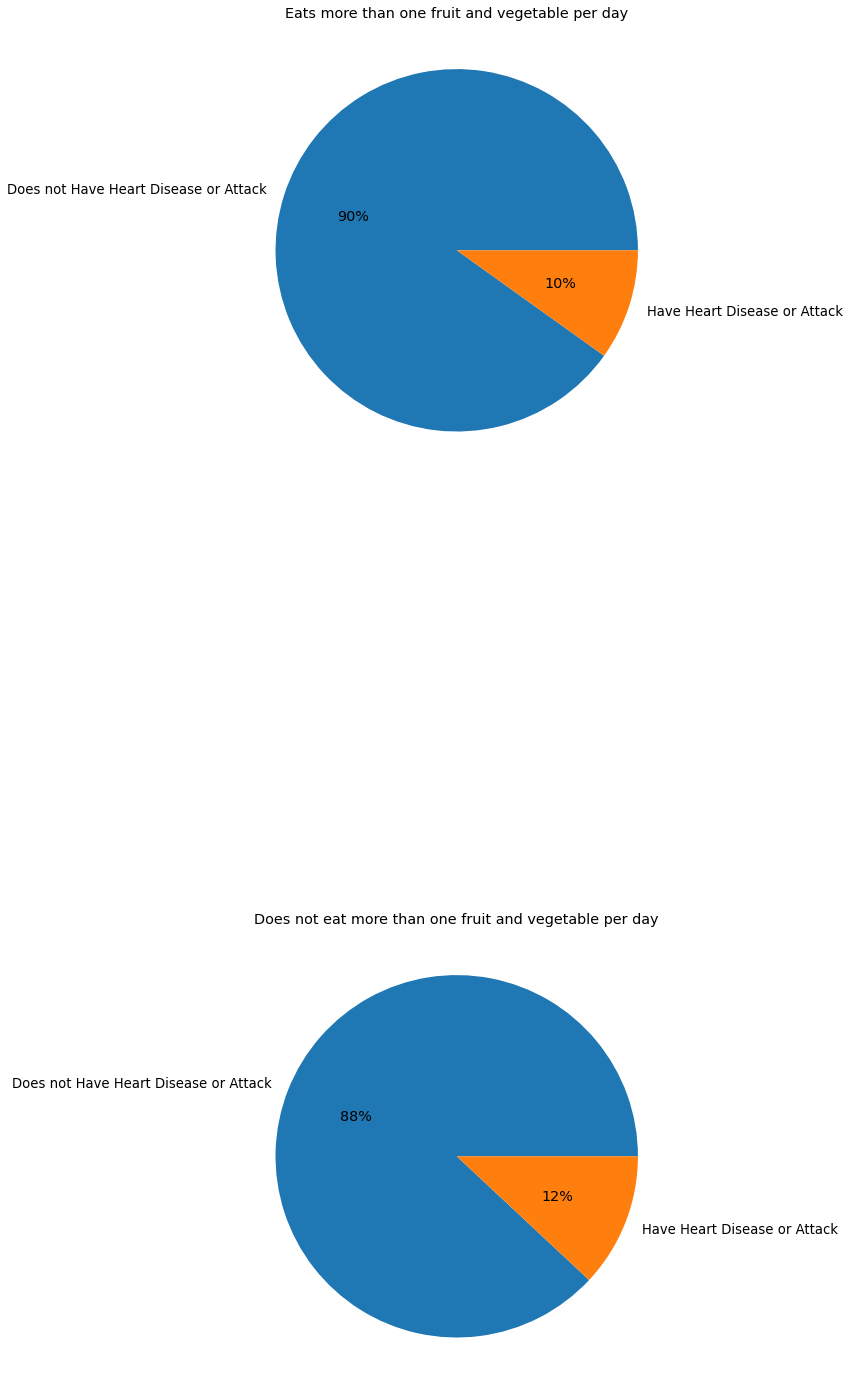

In [392]:
fig,axs = plt.subplots(2)
plt.subplots_adjust(wspace=1, hspace=1)
fv0 = df.loc[(df['Fruits'] == 0) & (df['Veggies']==0)]
fv1 = df.loc[(df['Fruits'] == 1) & (df['Veggies']==1)]
labels=['Does not Have Heart Disease or Attack','Have Heart Disease or Attack']
f0 = fv0['HeartDiseaseorAttack'].value_counts()
f1 = fv1['HeartDiseaseorAttack'].value_counts()
axs[0].pie(f1,autopct='%1.0f%%', labels=labels)
axs[0].title.set_text('Eats more than one fruit and vegetable per day')
axs[1].pie(f0,autopct='%1.0f%%', labels=labels)
axs[1].title.set_text('Does not eat more than one fruit and vegetable per day')
fig = plt.gcf()
fig.set_size_inches(25, 25)
fig.savefig('fruitss.png', dpi=100)

### People who don't eat fruits or vegetables have a higher chance of getting heart diseases/attacks than people who do by 2%

### They didn't lie !!!

|

|

### Smoking, High Cholesterol, High Blood Pressure were always a huge factor in heart diseases and attacks, so let's understand more the risks of being a smoker/having high cholestrol/blood pressure in the next few plots

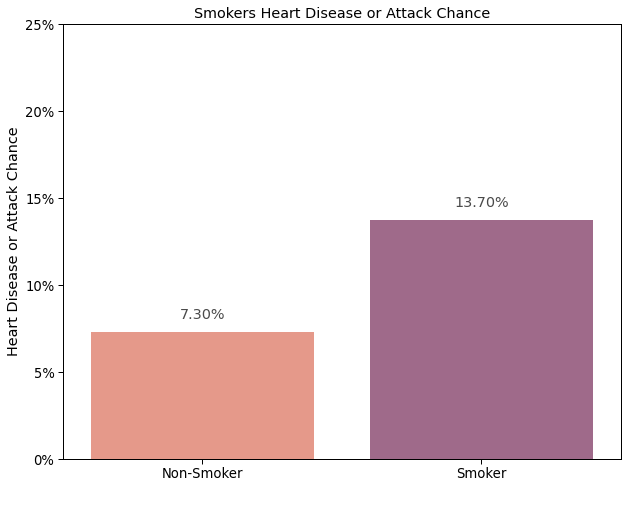

In [393]:
fig , ax = plt.subplots(1)
smoker0 = np.unique(np.array(df['Smoker'])).astype(int)
smokingdf = df[['Smoker', 'HeartDiseaseorAttack']].groupby('Smoker')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
smokingdf['Heart Disease or Attack Chance'] = round(smokingdf[1] / (smokingdf[0] + smokingdf[1]) * 100, 1)
smokingdf['Smoker'] = smoker0

plots=sns.barplot(data=smokingdf, x='Smoker', y='Heart Disease or Attack Chance', palette="rocket_r",alpha=0.7)

for i in smokingdf['Heart Disease or Attack Chance'].index:
    ax.annotate(f"{smokingdf['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, smokingdf['Heart Disease or Attack Chance'][i]+1),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1],['Non-Smoker','Smoker'])
plt.title("Smokers Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Expectedly, smokers have almost double the chance of getting heart disease or attack than non-smokers

|

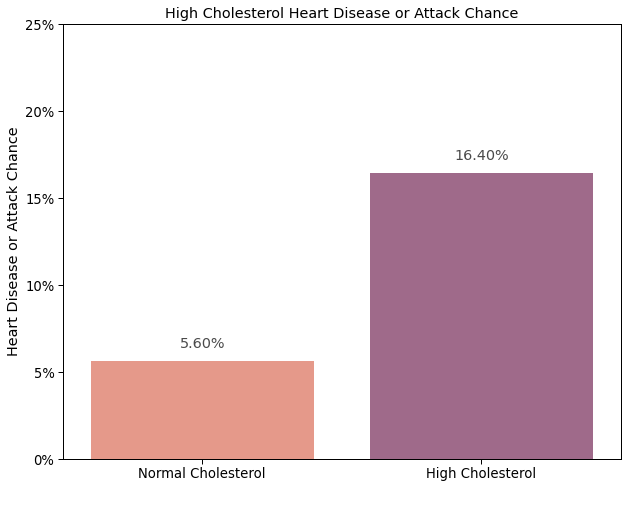

In [394]:
fig , ax = plt.subplots(1)
chol0 = np.unique(np.array(df['HighChol'])).astype(int)
choldf = df[['HighChol', 'HeartDiseaseorAttack']].groupby('HighChol')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
choldf['Heart Disease or Attack Chance'] = round(choldf[1] / (choldf[0] + choldf[1]) * 100, 1)
choldf['HighChol'] = chol0

plots=sns.barplot(data=choldf, x='HighChol', y='Heart Disease or Attack Chance', palette="rocket_r",alpha=0.7)

for i in choldf['Heart Disease or Attack Chance'].index:
    ax.annotate(f"{choldf['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, choldf['Heart Disease or Attack Chance'][i]+1),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1],['Normal Cholesterol','High Cholesterol'])
plt.title("High Cholesterol Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Having high cholesterol not only increases the chance, but also multiplies it by almost 3 times higher than having normal cholesterol !

|

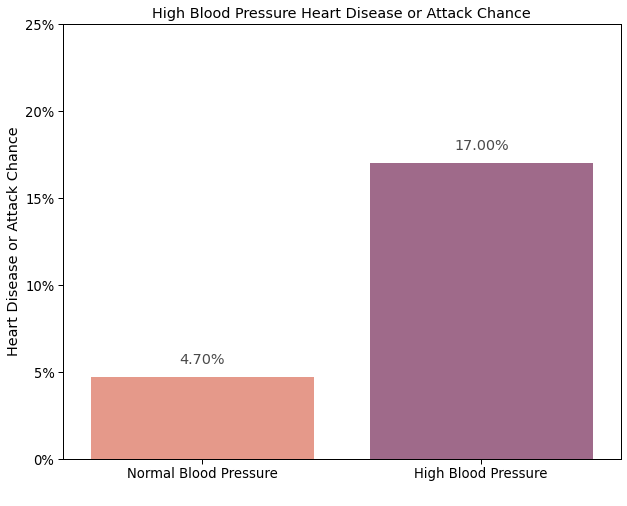

In [395]:
fig , ax = plt.subplots(1)
bpp = np.unique(np.array(df['HighBP'])).astype(int)
bpdf = df[['HighBP', 'HeartDiseaseorAttack']].groupby('HighBP')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
bpdf['Heart Disease or Attack Chance'] = round(bpdf[1] / (bpdf[0] + bpdf[1]) * 100, 1)
bpdf['HighBP'] = bpp

plots=sns.barplot(data=bpdf, x='HighBP', y='Heart Disease or Attack Chance', palette="rocket_r",alpha=0.7)

for i in bpdf['Heart Disease or Attack Chance'].index:
    ax.annotate(f"{bpdf['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, bpdf['Heart Disease or Attack Chance'][i]+1),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1],['Normal Blood Pressure','High Blood Pressure'])
plt.title("High Blood Pressure Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Having high blood pressure also multiplies the chances of getting heart diseases/attacks but this time with more than 3 times

|

|

### As we can now understand the risks of being a smoker or having high cholesterol/blood pressure, let's take a look at the risks if smoking was combined with the other factors in the next plots

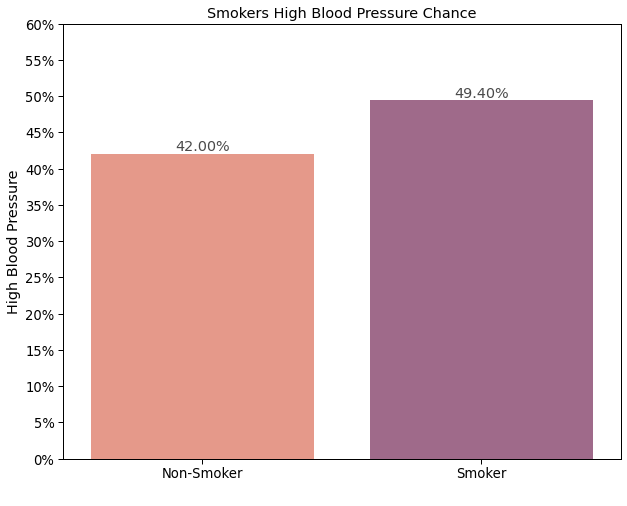

In [396]:
fig , ax = plt.subplots(1)
smoker = np.unique(np.array(df['Smoker'])).astype(int)
smoking_bp_df = df[['Smoker', 'HighBP']].groupby('Smoker')['HighBP'].value_counts().sort_index().unstack().fillna(0)
smoking_bp_df['High Blood Pressure'] = round(smoking_bp_df[1] / (smoking_bp_df[0] + smoking_bp_df[1]) * 100, 1)
smoking_bp_df['Smoker'] = smoker

plots=sns.barplot(data=smoking_bp_df, x='Smoker', y='High Blood Pressure', palette="rocket_r",alpha=0.7)

for i in smoking_bp_df['High Blood Pressure'].index:
    ax.annotate(f"{smoking_bp_df['High Blood Pressure'][i]:.02f}%", 
                   xy=(i, smoking_bp_df['High Blood Pressure'][i]+1),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60],['0%', '5%', '10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'])
plt.xticks([0,1],['Non-Smoker','Smoker'])
plt.title("Smokers High Blood Pressure Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Smoking increases the chance of having high blood pressure by more than 7% raising the it to 49.40%

|

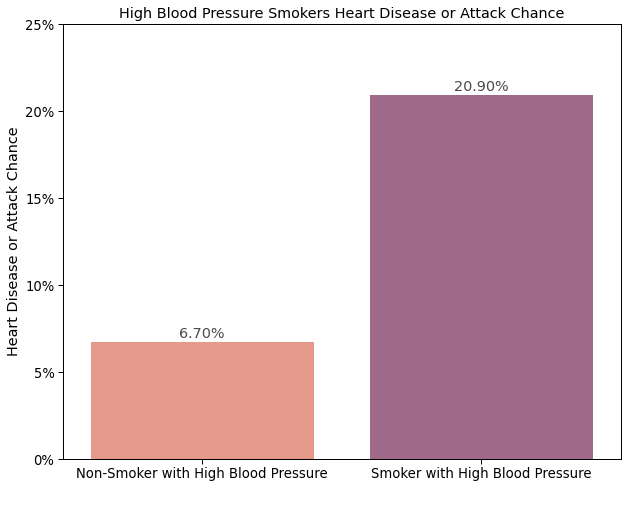

In [397]:
fig, ax = plt.subplots(1)
bp = np.unique(np.array(df['HighBP'])).astype(int)
smokersdf = df.copy()
smokersdf.drop(smokersdf[smokersdf['Smoker'] == 0].index, inplace = True)
smoking_bp_df1 = smokersdf[['HighBP', 'HeartDiseaseorAttack']].groupby('HighBP')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
smoking_bp_df1['Heart Disease or Attack Chance'] = round(smoking_bp_df1[1] / (smoking_bp_df1[0] + smoking_bp_df1[1]) * 100, 1)
smoking_bp_df1['Smoker with High Blood Pressure'] = bp
sns.barplot(data=smoking_bp_df1, x='Smoker with High Blood Pressure', y='Heart Disease or Attack Chance', palette="rocket_r",alpha=0.7)
for i in smoking_bp_df1['Heart Disease or Attack Chance'].index:
    ax.annotate(f"{smoking_bp_df1['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, smoking_bp_df1['Heart Disease or Attack Chance'][i]+0.5),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1],['Non-Smoker with High Blood Pressure','Smoker with High Blood Pressure'])
plt.title("High Blood Pressure Smokers Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Being a smoker with high blood pressure increases the chances of getting heart diseases/attacks exponentially multiplying  the chance by more than 3 times    

|

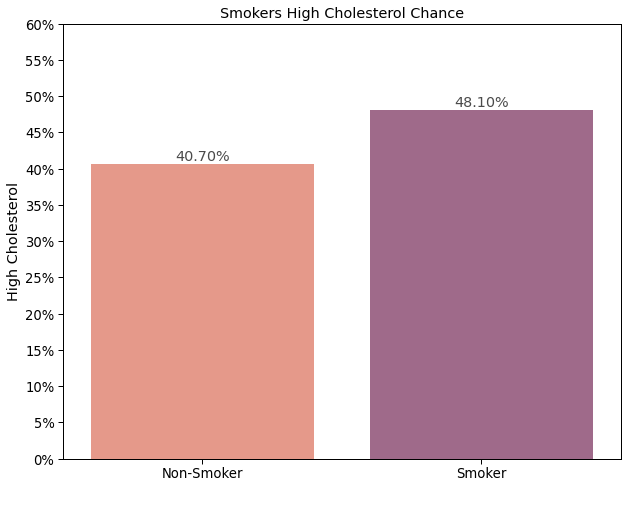

In [398]:
fig, ax = plt.subplots(1)
smoker1 = np.unique(np.array(df['Smoker'])).astype(int)
smokingchol = df[['Smoker', 'HighChol']].groupby('Smoker')['HighChol'].value_counts().sort_index().unstack().fillna(0)
smokingchol['High Cholesterol'] = round(smokingchol[1] / (smokingchol[0] + smokingchol[1]) * 100, 1)
smokingchol['Smoker'] = smoker1
plots=sns.barplot(data=smokingchol, x='Smoker', y='High Cholesterol', palette="rocket_r",alpha=0.7)
for i in smokingchol['High Cholesterol'].index:
    ax.annotate(f"{smokingchol['High Cholesterol'][i]:.02f}%", 
                   xy=(i, smokingchol['High Cholesterol'][i]+1),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60],['0%', '5%', '10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'])
plt.xticks([0,1],['Non-Smoker','Smoker'])
plt.title("Smokers High Cholesterol Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Smoking increases the chance of having high cholesterol by more than 7% raising the it to 48.10%

|

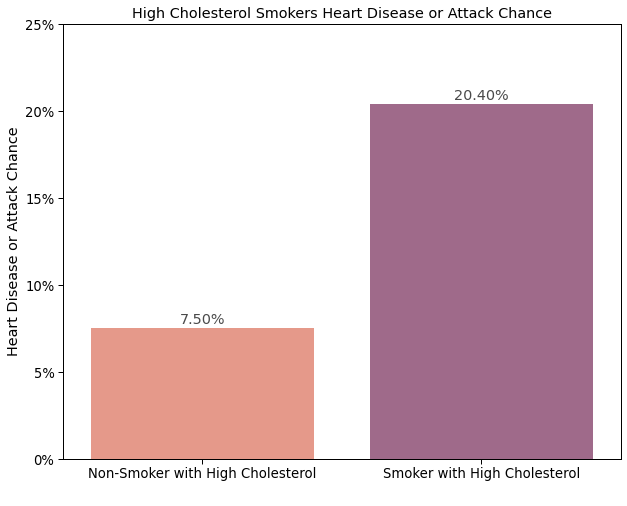

In [399]:
fig, (ax0) = plt.subplots(1) 
chol = np.unique(np.array(df['HighChol'])).astype(int)
smokerscholdf = df.copy()
smokerscholdf.drop(smokerscholdf[smokerscholdf['Smoker'] == 0].index, inplace = True)
smokchol = smokerscholdf[['HighChol', 'HeartDiseaseorAttack']].groupby('HighChol')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
smokchol['Heart Disease or Attack Chance'] = round(smokchol[1] / (smokchol[0] + smokchol[1]) * 100, 1)
smokchol['Smoker with High Cholesterol'] = chol
sns.barplot(data=smokchol, x='Smoker with High Cholesterol', y='Heart Disease or Attack Chance', ax=ax0, palette="rocket_r",alpha=0.7)
for i in smokchol['Heart Disease or Attack Chance'].index:
    ax0.annotate(f"{smokchol['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, smokchol['Heart Disease or Attack Chance'][i]+0.5),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1],['Non-Smoker with High Cholesterol','Smoker with High Cholesterol'])
plt.title("High Cholesterol Smokers Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Being a smoker with high cholesterol also increases the chances of getting heart diseases/attacks exponentially

### We can conclude that smoking is seriously and dangerously a huge factor in multiplying the chances in getting heart diseases/attacks

|

|

### Visualizing the distribution of the BMI column for both genders

In [400]:
fig = px.histogram(df, x='BMI', color='Sex')
fig.show()

### There was no difference between the genders as both of them had most of the distribution between 20 and 40 BMI

|

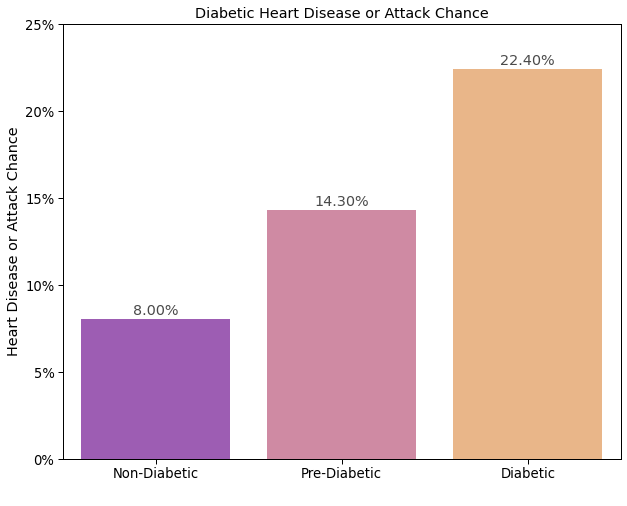

In [401]:
fig,ax0=plt.subplots(1)
diabetes = np.unique(np.array(df['Diabetes'])).astype(int)
tdf = df[['Diabetes', 'HeartDiseaseorAttack']].groupby('Diabetes')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
tdf['Heart Disease or Attack Chance'] = round(tdf[1] / (tdf[0] + tdf[1]) * 100, 1)
tdf['Diabetes'] = diabetes
sns.barplot(data=tdf, x='Diabetes', y='Heart Disease or Attack Chance', palette="plasma",alpha=0.7)
for i in tdf['Heart Disease or Attack Chance'].index:
    ax0.annotate(f"{tdf['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i, tdf['Heart Disease or Attack Chance'][i]+0.5),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.yticks([0,5,10,15,20,25],['0%', '5%', '10%','15%','20%','25%'])
plt.xticks([0,1,2],['Non-Diabetic','Pre-Diabetic','Diabetic'])
plt.title("Diabetic Heart Disease or Attack Chance")
plt.xlabel(" ")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Each stage of diabetes increases the chances of getting heart diseases/attacks by an average of 7%, raising the chances from 8% (non-diabetic) to 22.4% (diabetic)

|

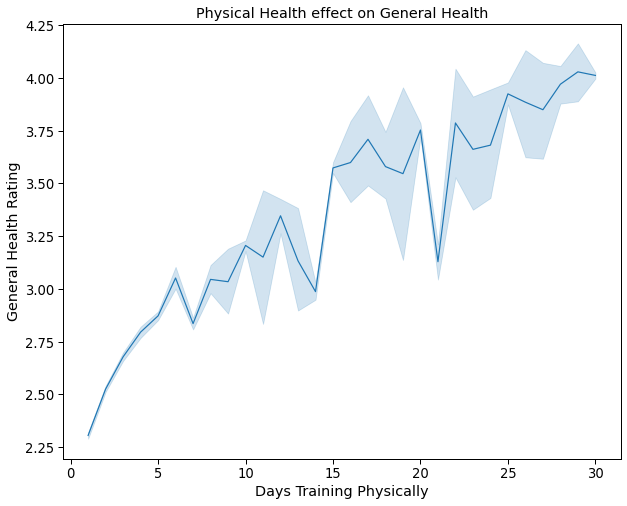

In [402]:
fig,ax=plt.subplots(1)
new = df.copy()
new.drop(new[new['PhysHlth'] == 0].index, inplace = True)
sns.lineplot(data=new,x='PhysHlth',y='GenHlth')
plt.title("Physical Health effect on General Health")
plt.xlabel("Days Training Physically")
plt.ylabel("General Health Rating")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### People who give attention to their physical health and do more physical activities tend to have higher ratings for their overall health condition

|

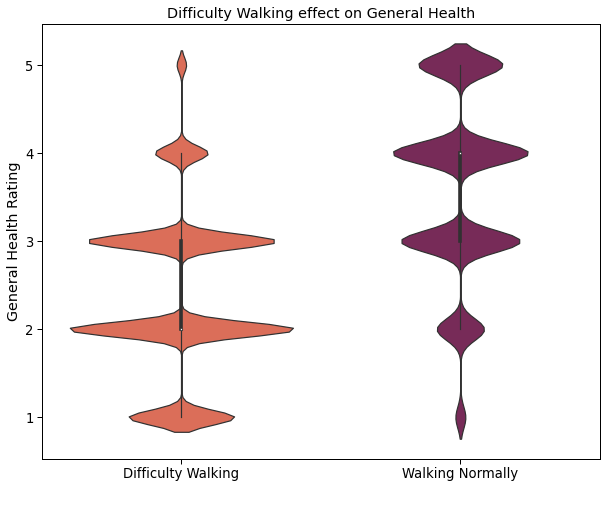

In [403]:
fig,ax=plt.subplots(1)
sns.violinplot(data=df,x='DiffWalk',y='GenHlth', palette="rocket_r",alpha=0.7)
plt.xticks([0,1],['Difficulty Walking','Walking Normally'])
plt.xlabel(" ")
plt.title("Difficulty Walking effect on General Health")
plt.ylabel("General Health Rating")
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Predictably, people who have difficulty walking or climbing stairs tend to have lower general health ratings than people who walks and climbs stairs easily, let's check how would this affect the chances of getting heart diseases/attacks

|

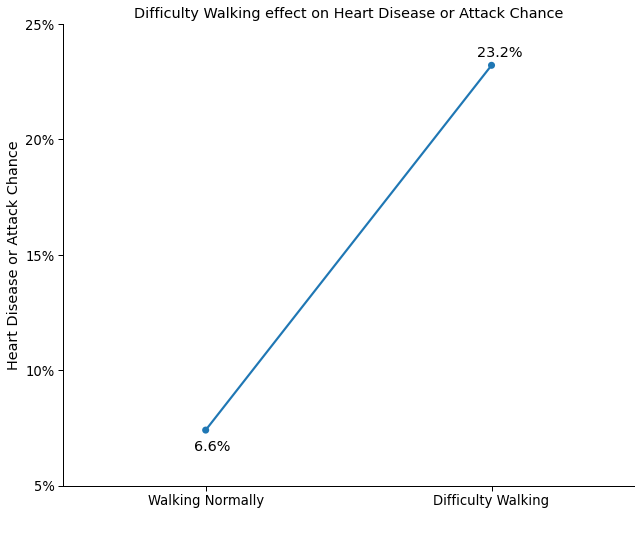

In [404]:

walk = np.unique(np.array(df['DiffWalk'])).astype(int)
walkdf = df[['DiffWalk', 'HeartDiseaseorAttack']].groupby('DiffWalk')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
walkdf['Heart Disease or Attack Chance'] = round(walkdf[1] / (walkdf[0] + walkdf[1]) * 100,1)
walkdf['Difficulty Walking / Climbing Stairs'] = walk
sns.catplot(data=walkdf,x='Difficulty Walking / Climbing Stairs',y='Heart Disease or Attack Chance', kind='point')
plt.xticks([0,1],['Walking Normally','Difficulty Walking'])
plt.xlabel(" ")
plt.yticks([5,10,15,20,25],['5%', '10%','15%','20%','25%'])
plt.title("Difficulty Walking effect on Heart Disease or Attack Chance")
plt.text(-0.04,6.5,'6.6%')
plt.text(0.95,23.6,'23.2%')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### As shown in the plot above people having difficulties walking or climbing stairs are more than 3 times more likely to have heart diseases/attacks

|

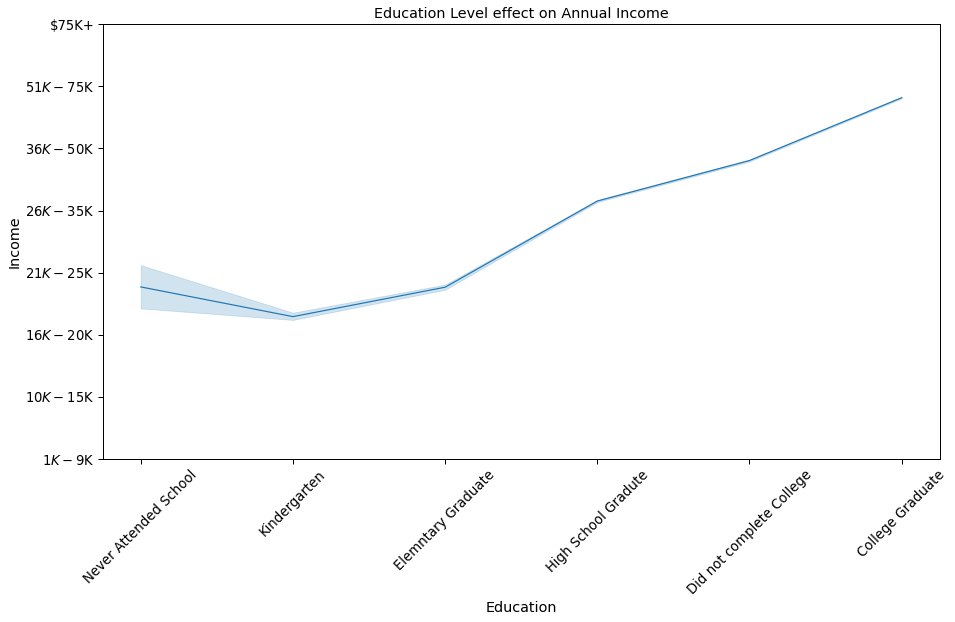

In [405]:
fig,ax=plt.subplots(1)
sns.lineplot(data=df,x='Education', y='Income')
plt.xticks([1,2,3,4,5,6],['Never Attended School','Kindergarten','Elemntary Graduate','High School Gradute','Did not complete College','College Graduate'],rotation=45)
plt.yticks([1,2,3,4,5,6,7,8])
plt.yticks([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], ['$1K-$9K','$10K-$15K','$16K-$20K','$21K-$25K','$26K-$35K','$36K-$50K','$51K-$75K','$75K+'])
plt.title("Education Level effect on Annual Income")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

### Education does make a huge difference raising the income from around 20K (attended only kindergarten) to around 75k (college graduate) per year

|

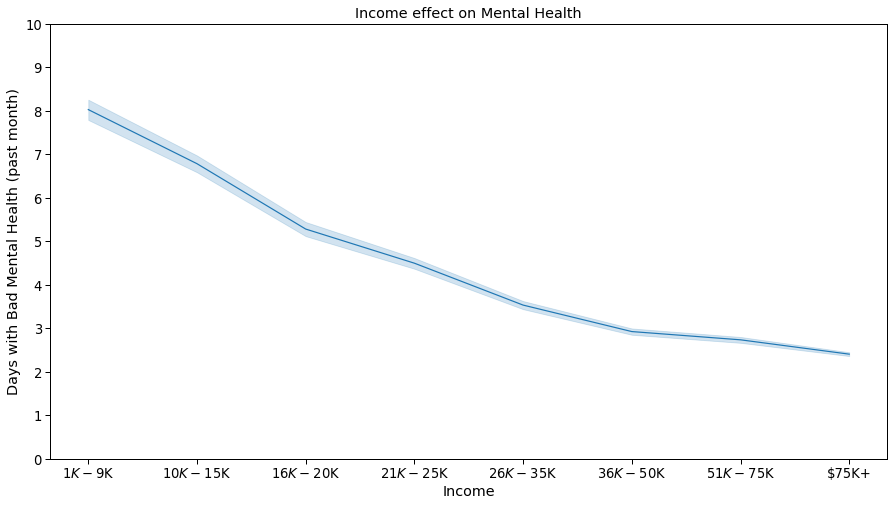

In [406]:
fig,ax=plt.subplots(1)
sns.lineplot(data=df,x='Income', y='MentHlth')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel("Days with Bad Mental Health (past month)")
plt.xticks([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8], ['$1K-$9K','$10K-$15K','$16K-$20K','$21K-$25K','$26K-$35K','$36K-$50K','$51K-$75K','$75K+'])
plt.title("Income effect on Mental Health")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

### Lower Income has an obvious affect on the count of days with bad mental health,does money buy happiness?

|

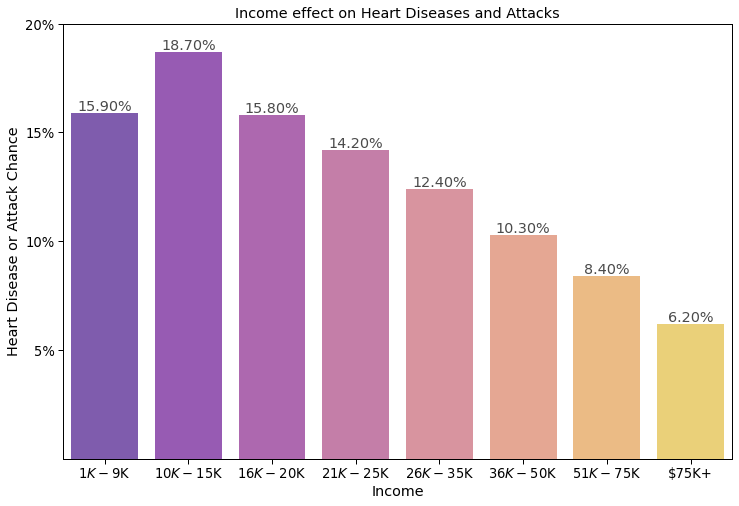

In [407]:
indf = df[['Income','HeartDiseaseorAttack']].groupby('Income')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
indf['Heart Disease or Attack Chance'] = round(indf[1] / (indf[0] + indf[1]) * 100, 1)
indf['Income'] = np.unique(np.array(df['Income']))
fig,ax=plt.subplots(1)
sns.barplot(data=indf, x='Income', y='Heart Disease or Attack Chance', palette="plasma",alpha=0.7)
for i in indf['Heart Disease or Attack Chance'].index:
    ax.annotate(f"{indf['Heart Disease or Attack Chance'][i]:.02f}%", 
                   xy=(i-1, indf['Heart Disease or Attack Chance'][i]+0.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
plt.xticks([0,1.0,2.0,3.0,4.0,5.0,6.0,7.0], ['$1K-$9K','$10K-$15K','$16K-$20K',
                                             '$21K-$25K','$26K-$35K','$36K-$50K','$51K-$75K','$75K+'])
plt.yticks([5,10,15,20],['5%', '10%','15%','20%'])
plt.title("Income effect on Heart Diseases and Attacks")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

### Having higher income shrinks the chance of getting heart diseases/attacks to less than one third, if you're still questioning, YES MONEY DOES BUY HAPINESS

|

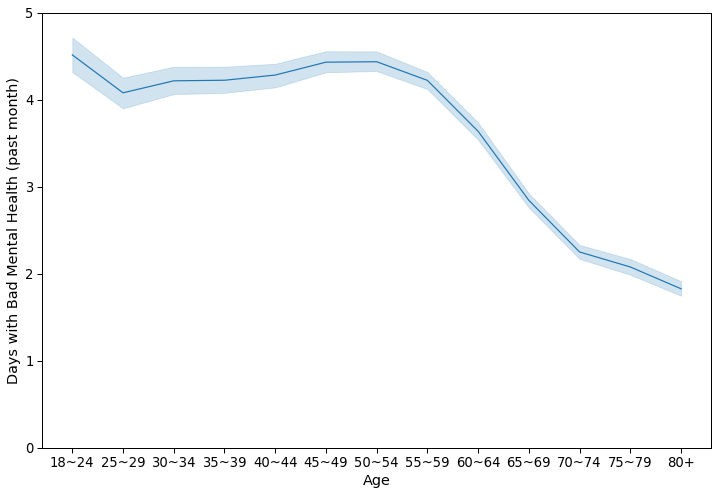

In [408]:
sns.lineplot(data=df, x='Age',y='MentHlth')
plt.ylabel("Days with Bad Mental Health (past month)")
plt.yticks([0,1,2,3,4,5])
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

### Getting older decreases the chances of having bad mental health days especially after 55 years old

|

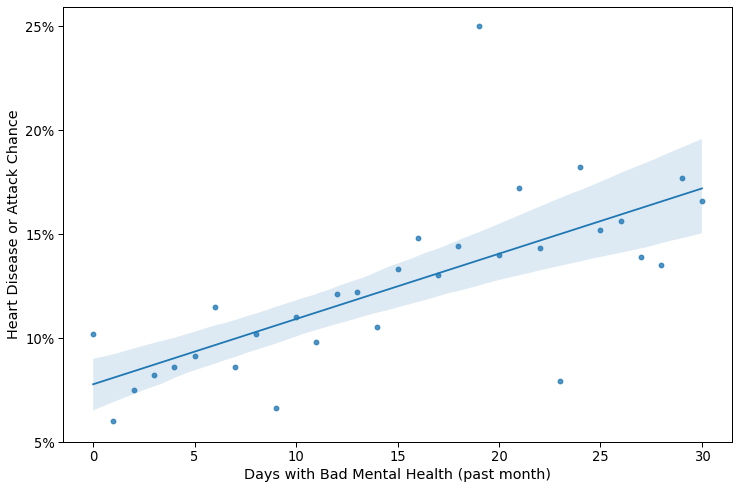

In [409]:
mentdf = df[['MentHlth', 'HeartDiseaseorAttack']].groupby('MentHlth')['HeartDiseaseorAttack'].value_counts().sort_index().unstack().fillna(0)
mentdf['Heart Disease or Attack Chance'] = round(mentdf[1] / (mentdf[0] + mentdf[1]) * 100, 1)
mentdf['Mental Health'] = np.unique(np.array(df['MentHlth']))
sns.regplot(data=mentdf, x='Mental Health', y='Heart Disease or Attack Chance')
plt.xlabel('Days with Bad Mental Health (past month)')
plt.yticks([5,10,15,20,25],['5%', '10%','15%','20%','25%'])
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

### People who go through days with bad mental health tend to have higher chances of getting a heart disease/attack

|

In [410]:
has_stroke = df[df['Stroke']==1]

no_stroke = df[df['Stroke']==0]

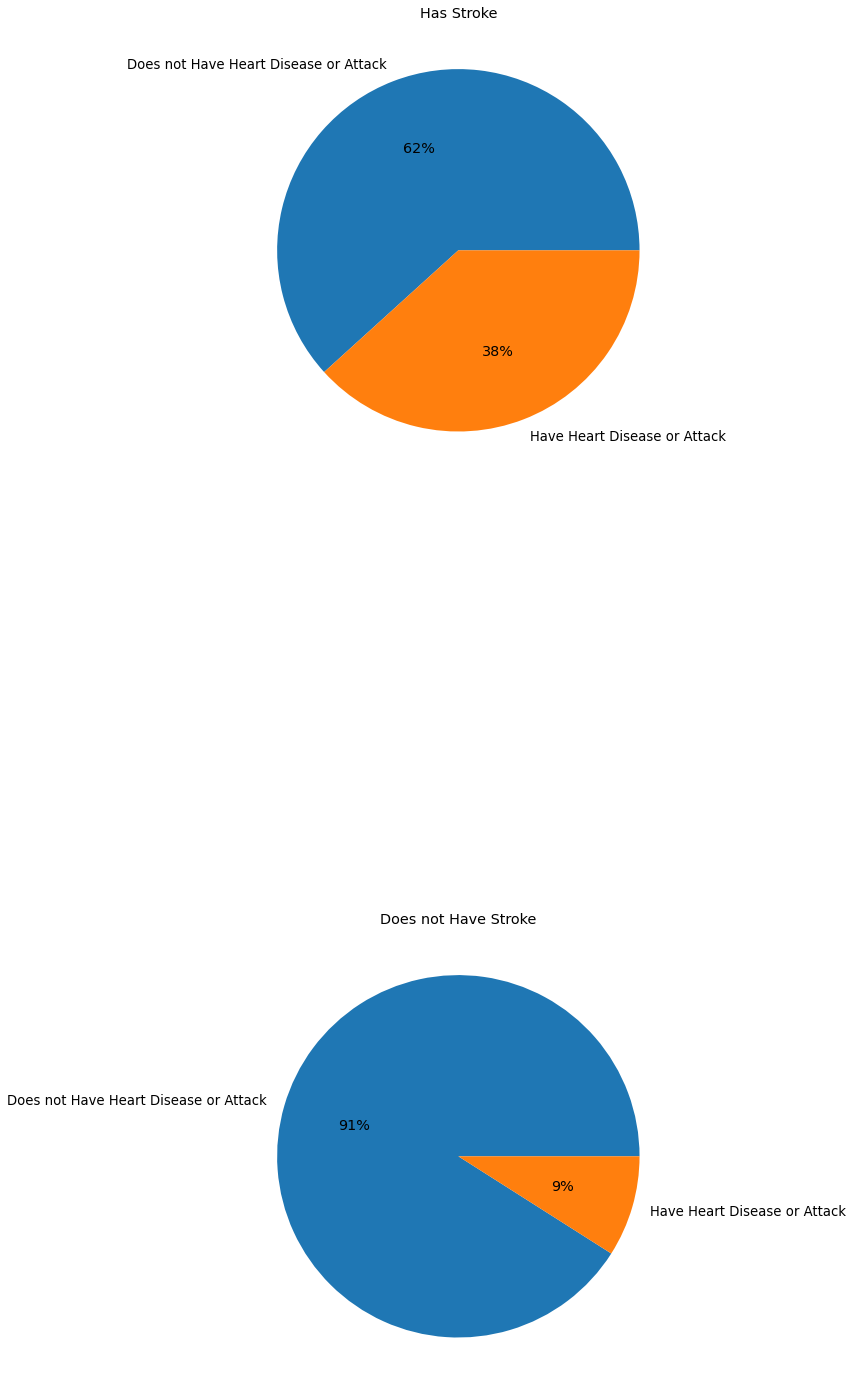

In [411]:
fig,axs = plt.subplots(2)
plt.subplots_adjust(wspace=1, hspace=1)
ss0 = df.loc[(df['Stroke'] == 0)]
ss1 = df.loc[(df['Stroke'] == 1)]
labels=['Does not Have Heart Disease or Attack','Have Heart Disease or Attack']
s0 = ss0['HeartDiseaseorAttack'].value_counts()
s1 = ss1['HeartDiseaseorAttack'].value_counts()
axs[0].pie(s1,autopct='%1.0f%%', labels=labels)
axs[0].title.set_text('Has Stroke')
axs[1].pie(s0,autopct='%1.0f%%', labels=labels)
axs[1].title.set_text('Does not Have Stroke')
fig = plt.gcf()
fig.set_size_inches(25, 25)
fig.savefig('fruits.png', dpi=100)

### People who experienced a stroke are 4 times more likely to get heart diseases/attacks

|

|

### Visualizing the correlation between the target column (HeartDiseaseorAttack) and the other columns

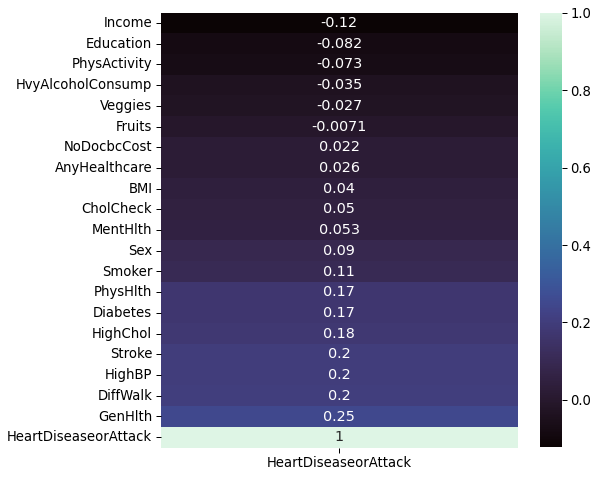

In [412]:
corr= df.corr()[['HeartDiseaseorAttack']].sort_values(by='HeartDiseaseorAttack')
sns.heatmap(corr, cmap="mako", annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### All correlations are low so there is no need for feature selection

|

### Encoding the Age column

In [413]:
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
123466                   0.0     0.0       0.0        1.0  32.0     0.0   
92598                    0.0     0.0       0.0        1.0  18.0     1.0   
200558                   0.0     0.0       0.0        1.0  27.0     1.0   
200561                   0.0     0.0       0.0        1.0  28.0     0.0   
17977                    0.0     0.0       0.0        1.0  20.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
83318                    1.0     1.0       0.0        0.0  24.0     1.0   
217137                   0.0     0.0       1.0        1.0  29.0     1.0   
21440                    0.0     1.0       0.0        1.0  21.0     0.0   
83292                    0.0     0.0       0.0        1.0  27.0     1.0   
31229                    0.0     1.0       0.0        1.0  21.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
123466     0.0       0.0           1.0     1.0  ...            1.0   
92598      0.0       0.0           1.0     1.0  ...            1.0   
200558     0.0       0.0           1.0     1.0  ...            0.0   
200561     0.0       0.0           1.0     0.0  ...            1.0   
17977      0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
83318      0.0       0.0           0.0     1.0  ...            1.0   
217137     0.0       0.0           1.0     1.0  ...            1.0   
21440      0.0       0.0           1.0     1.0  ...            1.0   
83292      0.0       2.0           0.0     0.0  ...            1.0   
31229      0.0       0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
123466          0.0      2.0       0.0       0.0       0.0  1.0    0   
92598           0.0      3.0       0.0      30.0       1.0  0.0    0   
200558          0.0      1.0      21.0       0.0       0.0  1.0    0   
200561          0.0      3.0      10.0       5.0       1.0  0.0    0   
17977           0.0      1.0       2.0       0.0       0.0  0.0    0   
...             ...      ...       ...       ...       ...  ...  ...   
83318           0.0      5.0       0.0      30.0       1.0  0.0   12   
217137          0.0      2.0       0.0       0.0       0.0  1.0   12   
21440           0.0      2.0       1.0       0.0       0.0  0.0   12   
83292           0.0      2.0       0.0       0.0       0.0  1.0   12   
31229           0.0      2.0       0.0       6.0       0.0  0.0   12   

        Education  Income  
123466        4.0     1.0  
92598         5.0     7.0  
200558        3.0     1.0  
200561        6.0     7.0  
17977         6.0     7.0  
...           ...     ...  
83318         6.0     4.0  
217137        5.0     5.0  
21440         6.0     7.0  
83292         6.0     8.0  
31229         4.0     5.0  

[229781 rows x 22 columns]

### Defining the target column

In [414]:
x=df.drop(["HeartDiseaseorAttack"], axis=1)
y=df["HeartDiseaseorAttack"]

### Splitting the dataset

In [415]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

### Applying Logistic Regression and validating the model 

In [416]:
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)
logreg_pred  = logreg.predict(x_test1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

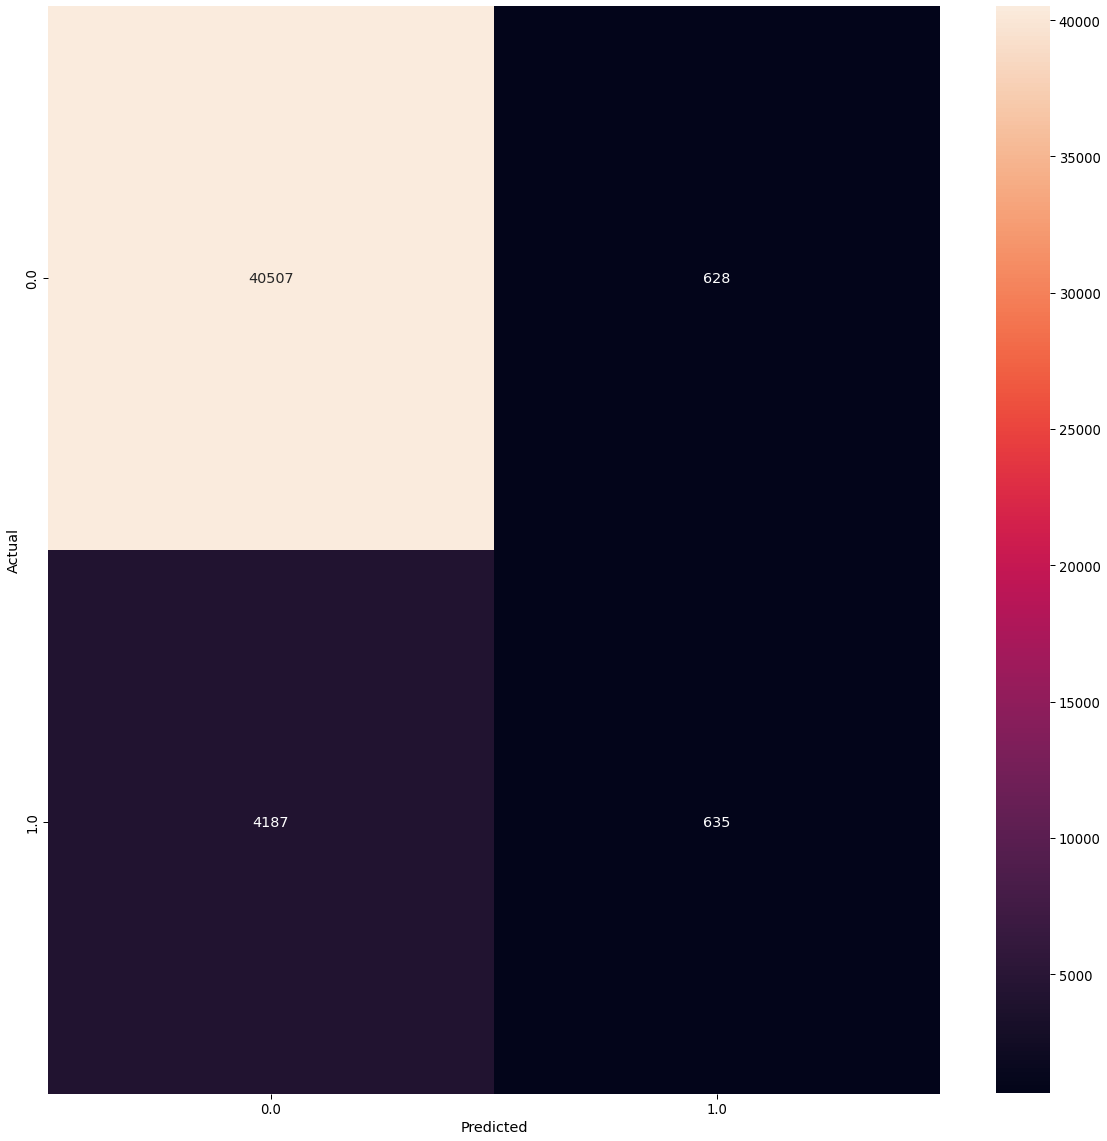

In [417]:
cm = pd.crosstab(y_test1, logreg_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [418]:
acc = (logreg.score(x_test1, y_test1))
print(f"Accuracy: {round(acc,2)*100}%")
recall = recall_score(y_test1, logreg_pred)
print(f"Recall: {round(recall,2)*100}%")
precision = precision_score(y_test1, logreg_pred)
print(f"Precision: {round(precision,2)*100}%")
Specificity=recall_score(y_test1, logreg_pred, pos_label=0)
print(f"Specificity: {round(Specificity,2)*100}%")

Accuracy: 90.0%
Recall: 13.0%
Precision: 50.0%
Specificity: 98.0%


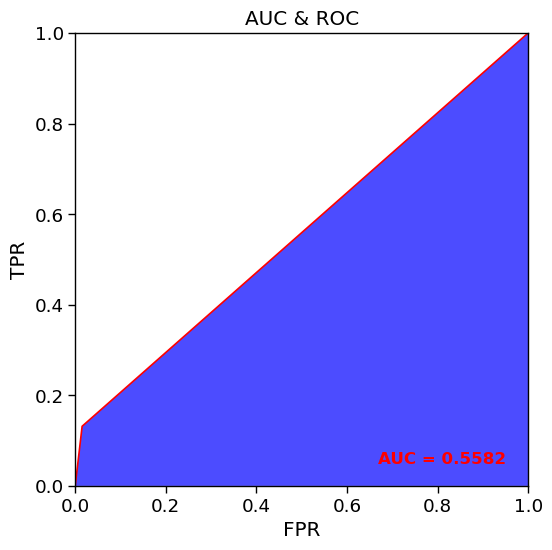

In [419]:
auc = metrics.roc_auc_score(y_test1, logreg_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Applying KNN and validating the model 

In [420]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train1,y_train1)
knn_pred=knn.predict(x_test1)
print('Accuracy for k= 19 is:',round(accuracy_score(knn_pred,y_test1),2))

Accuracy for k= 19 is: 0.89


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

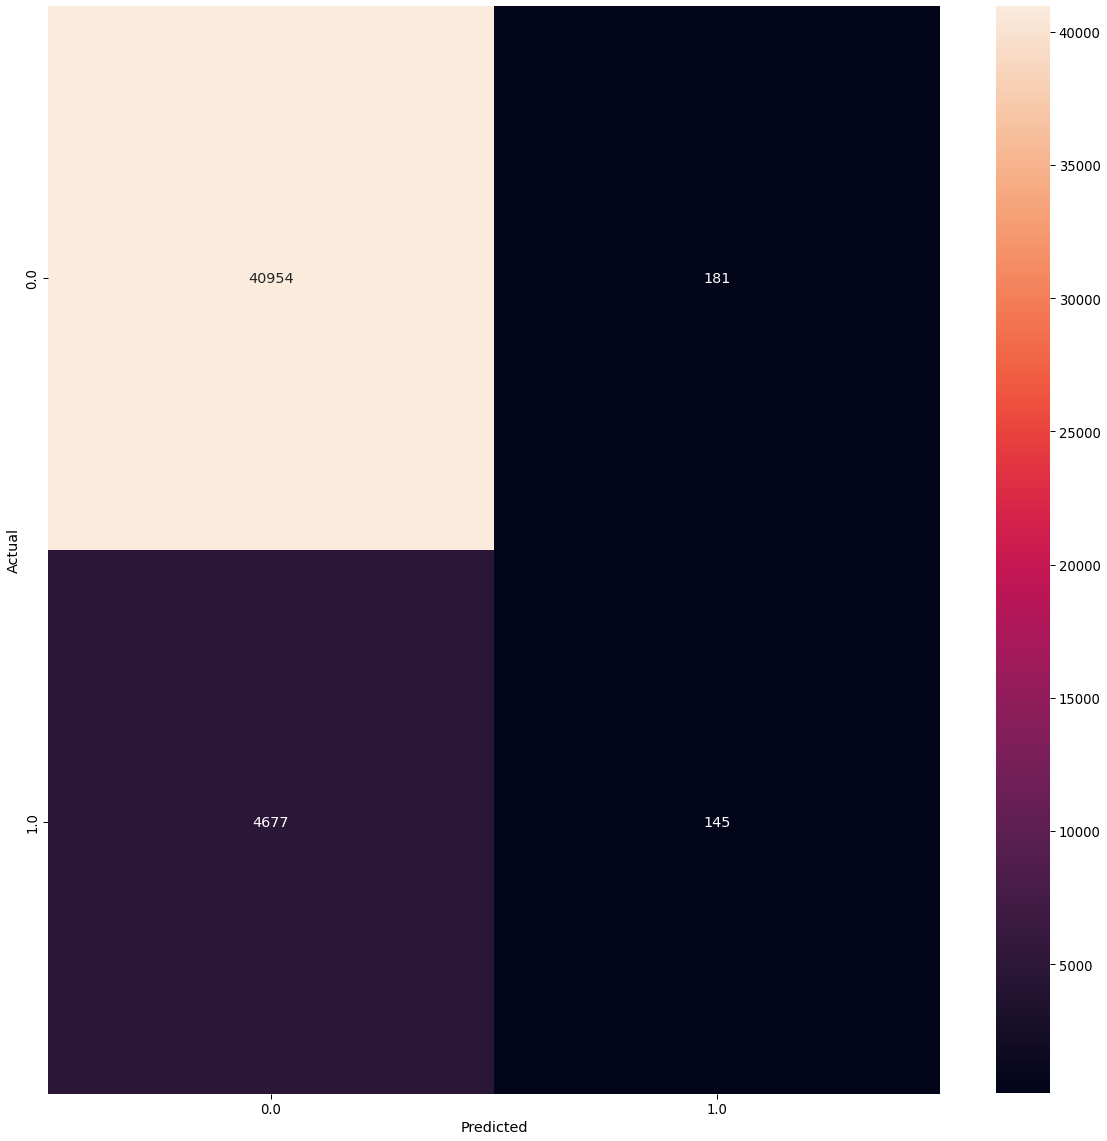

In [421]:
cm0 = pd.crosstab(y_test1, knn_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm0, annot=True, fmt='g')

In [422]:
acc = (knn.score(x_test1, y_test1))
print(f"Accuracy: {round(acc,2)*100}%")
recall = recall_score(y_test1, knn_pred)
print(f"Recall: {round(recall,2)*100}%")
precision = precision_score(y_test1, knn_pred)
print(f"Precision: {round(precision,2)*100}%")
Specificity=recall_score(y_test1, knn_pred, pos_label=0)
print(f"Specificity: {round(Specificity,2)*100}%")

Accuracy: 89.0%
Recall: 3.0%
Precision: 44.0%
Specificity: 100.0%


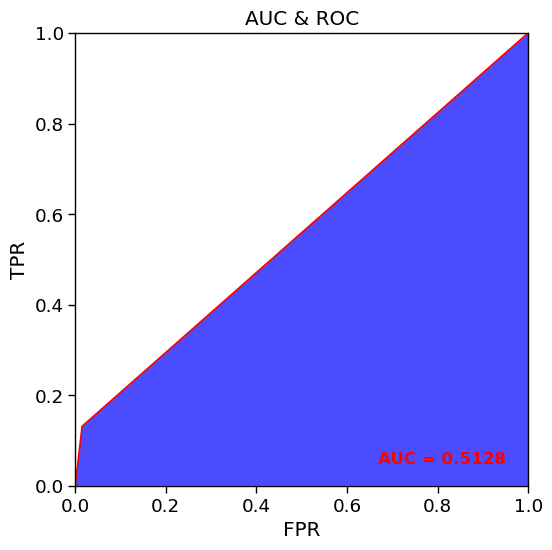

In [423]:
auc = metrics.roc_auc_score(y_test1, knn_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Applying Decision Tree without pruning and validating the model 

In [424]:
t0 = tree.DecisionTreeClassifier()  
t0.fit(x_train1, y_train1)
treepred0=t0.predict(x_test1)
acc0 = accuracy_score(y_test1, treepred0)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

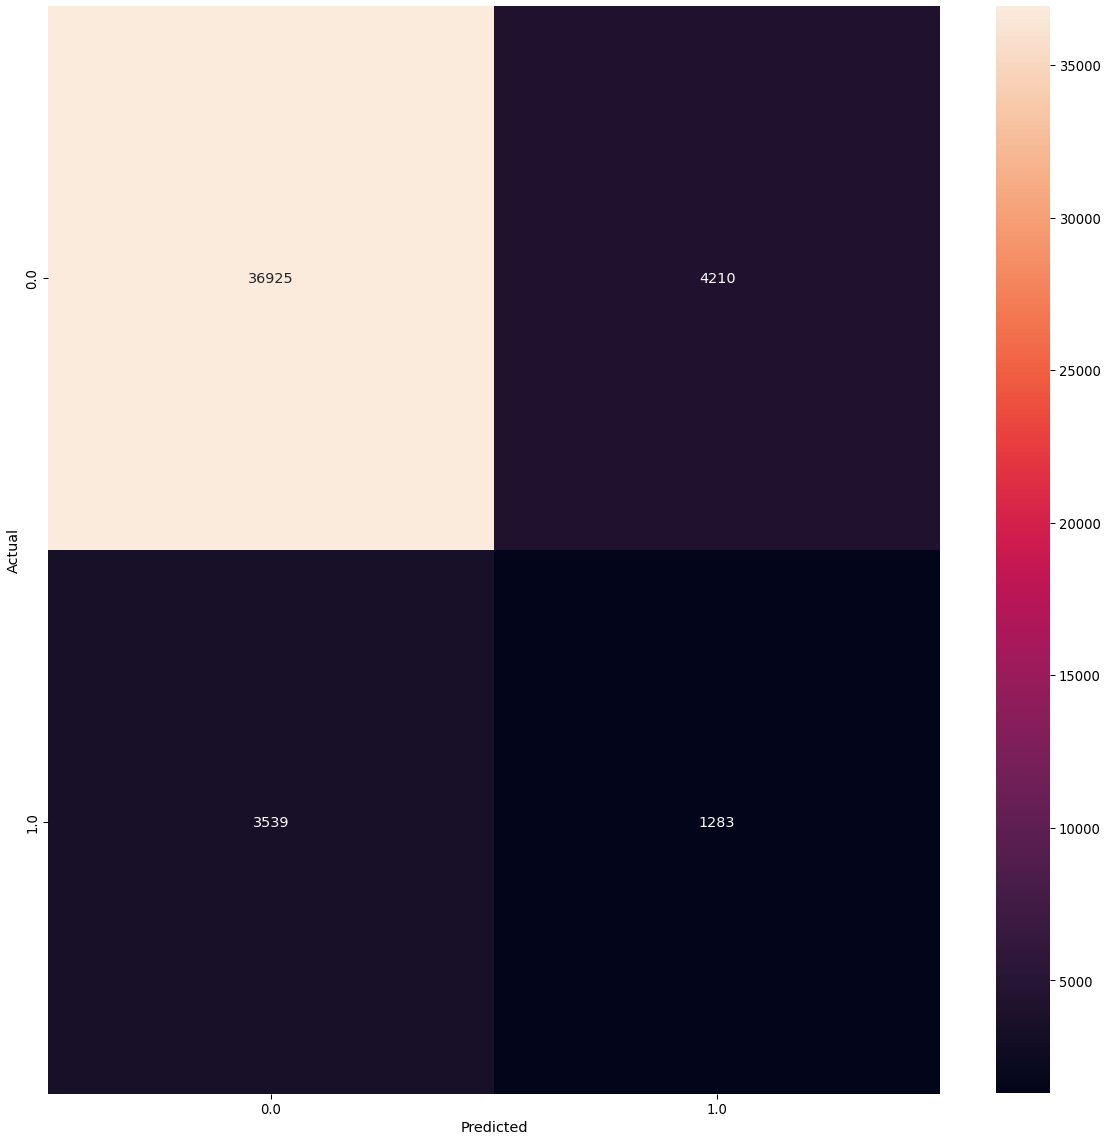

In [425]:
cm = pd.crosstab(y_test1, treepred0, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [426]:
acc = (t0.score(x_test1, y_test1))
print(f"Accuracy: {round(acc,2)*100}%")
recall = recall_score(y_test1, treepred0)
print(f"Recall: {round(recall,2)*100}%")
precision = precision_score(y_test1, treepred0)
print(f"Precision: {round(precision,2)*100}%")
Specificity=recall_score(y_test1, treepred0, pos_label=0)
print(f"Specificity: {round(Specificity,2)*100}%")

Accuracy: 83.0%
Recall: 27.0%
Precision: 23.0%
Specificity: 90.0%


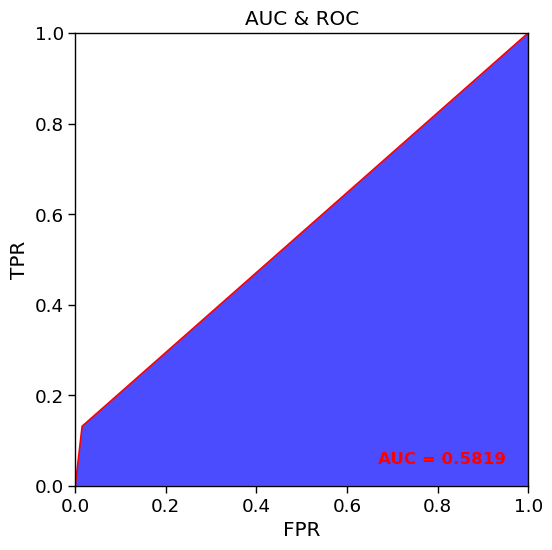

In [427]:
auc = metrics.roc_auc_score(y_test1, treepred0)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Applying Decision Tree with pruning and validating the model 

In [428]:
t2 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes=20, min_samples_leaf = 3, max_depth = 15)  
t2.fit(x_train1, y_train1)
treepred2=t2.predict(x_test1)
acc2 = accuracy_score(y_test1, treepred2)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

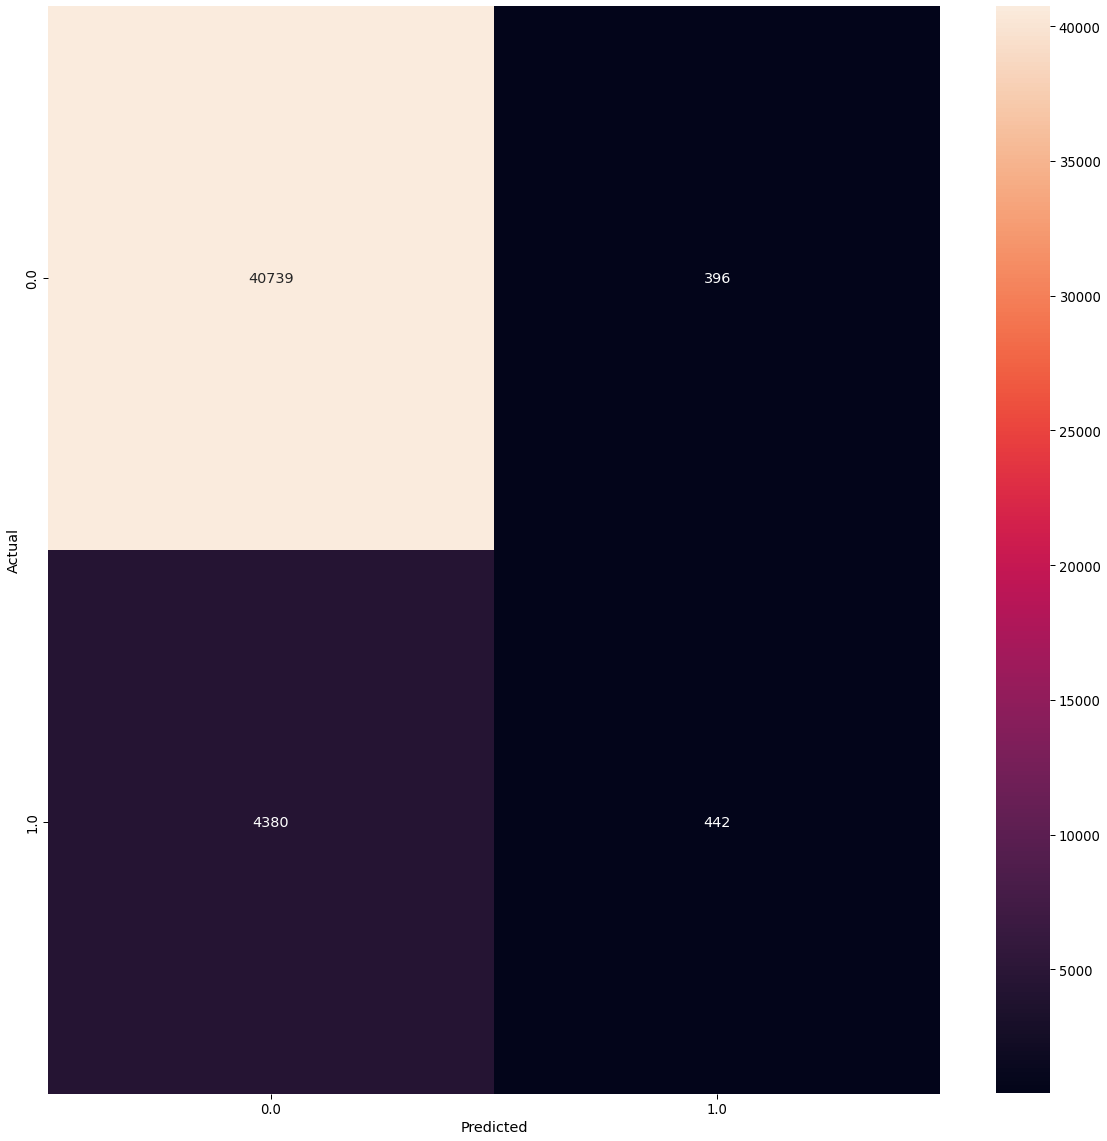

In [429]:
cm = pd.crosstab(y_test1, treepred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [430]:
acc = (t2.score(x_test1, y_test1))
print(f"Accuracy: {round(acc,2)*100}%")
recall = recall_score(y_test1, treepred2)
print(f"Recall: {round(recall,2)*100}%")
precision = precision_score(y_test1, treepred2)
print(f"Precision: {round(precision,2)*100}%")
Specificity=recall_score(y_test1, treepred2, pos_label=0)
print(f"Specificity: {round(Specificity,2)*100}%")

Accuracy: 90.0%
Recall: 9.0%
Precision: 53.0%
Specificity: 99.0%


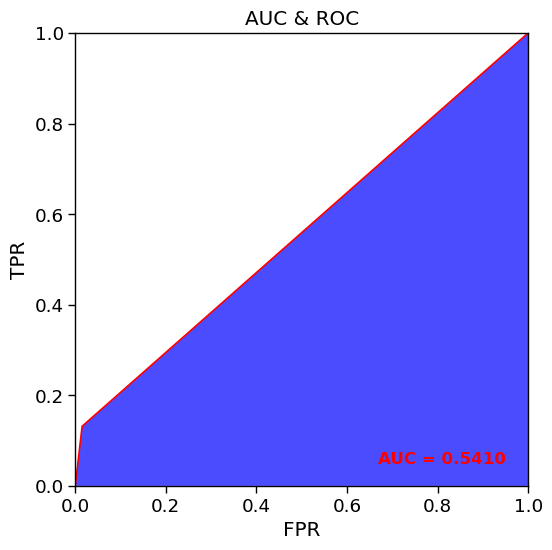

In [431]:
auc = metrics.roc_auc_score(y_test1, treepred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Applying Random Forest and validating the model 

In [432]:
rf2=RandomForestClassifier(max_depth=17, min_samples_leaf=3, max_samples=0.5, random_state=80)
rf2.fit(x_train1, y_train1)
p4=rf2.predict(x_test1)
acc4 = accuracy_score(y_test1, p4) 
print(f"Accuracy: {round(acc4, 2)}")

Accuracy: 0.9


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

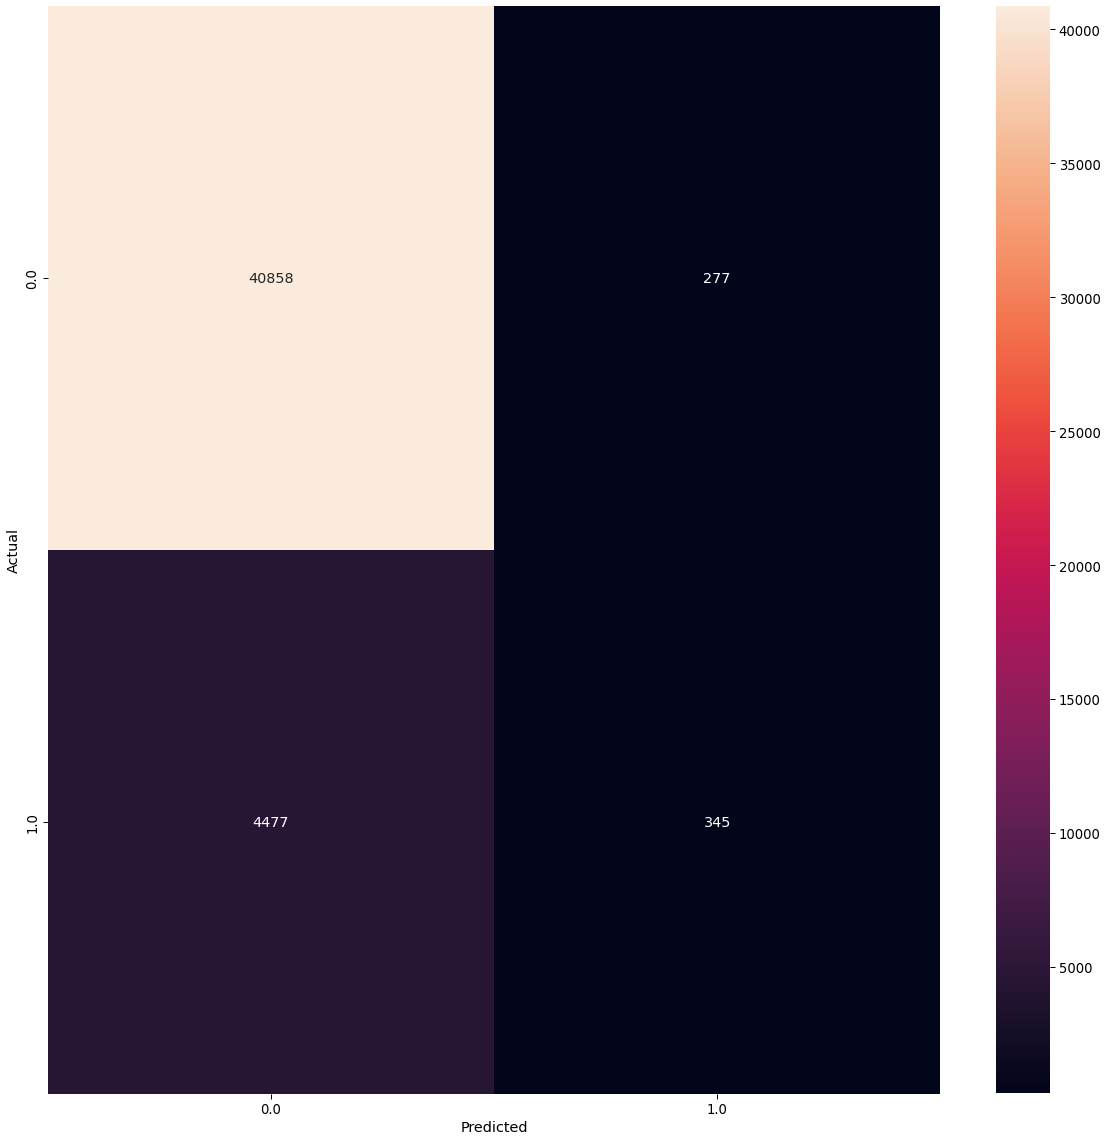

In [433]:
cm = pd.crosstab(y_test1, p4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [434]:
acc = (rf2.score(x_test1, y_test1))
print(f"Accuracy: {round(acc,2)*100}%")
recall = recall_score(y_test1, p4)
print(f"Recall: {round(recall,2)*100}%")
precision = precision_score(y_test1, p4)
print(f"Precision: {round(precision,2)*100}%")
Specificity=recall_score(y_test1, p4, pos_label=0)
print(f"Specificity: {round(Specificity,2)*100}%")

Accuracy: 90.0%
Recall: 7.000000000000001%
Precision: 55.00000000000001%
Specificity: 99.0%


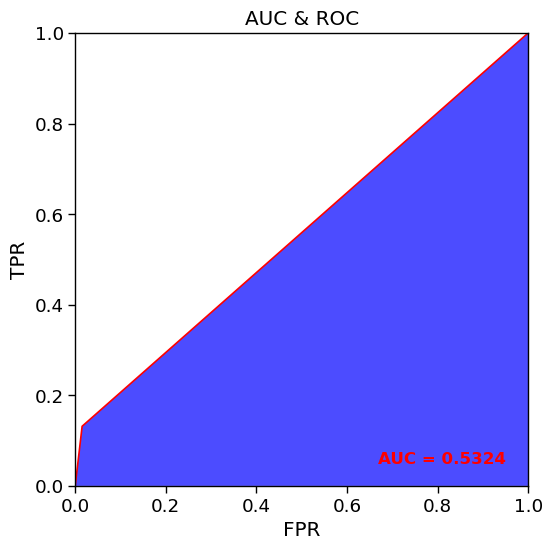

In [435]:
auc = metrics.roc_auc_score(y_test1, p4)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### In the medicine field the most important thing is to increase recall as much as you can to minimize the false negatives, so I traded some accuracy for way more higher recall and still getting reliable accuracy that is even more close to reality by applying Under Sampling

In [436]:
sm = RandomUnderSampler(random_state=11)
xs, ys= sm.fit_resample(x, y)

In [437]:
sm = RandomOverSampler(random_state=11)
xss, yss= sm.fit_resample(xs, ys)

In [438]:
x_train,x_test,y_train,y_test = train_test_split(xss,yss,test_size=0.2,random_state=0)

### Reapplying the Classifiers after sampling

In [439]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred  = logreg.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

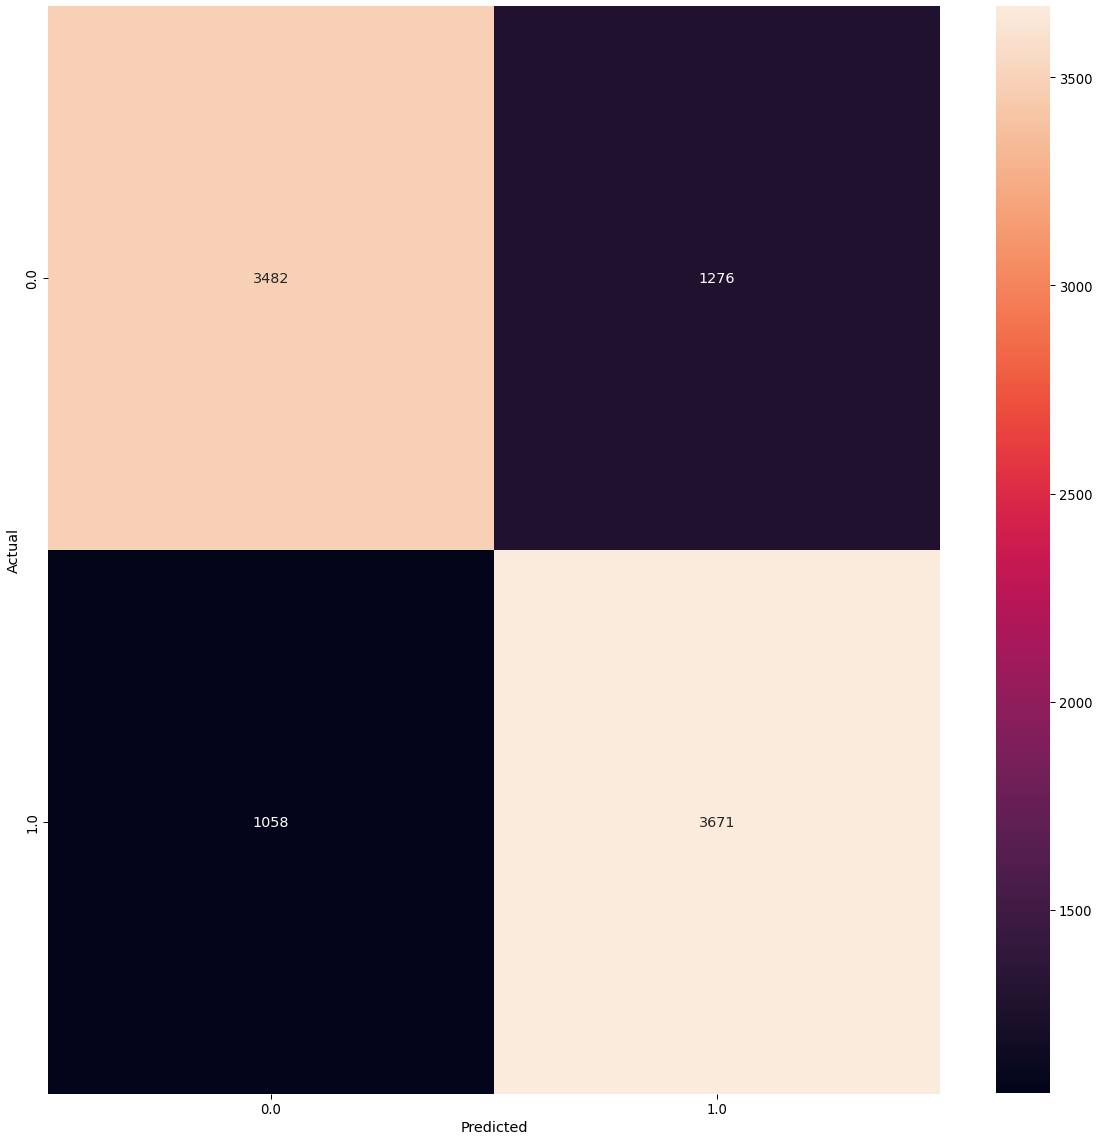

In [440]:
cm = pd.crosstab(y_test, logreg_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [441]:
acclog = (logreg.score(x_test, y_test))
print(f"Accuracy: {round(acclog,2)*100}%")
recalllog = recall_score(y_test, logreg_pred)
print(f"Recall: {round(recalllog,2)*100}%")
precisionlog = precision_score(y_test, logreg_pred)
print(f"Precision: {round(precisionlog,2)*100}%")
Specificitylog=recall_score(y_test, logreg_pred, pos_label=0)
print(f"Specificity: {round(Specificitylog,2)*100}%")

Accuracy: 75.0%
Recall: 78.0%
Precision: 74.0%
Specificity: 73.0%


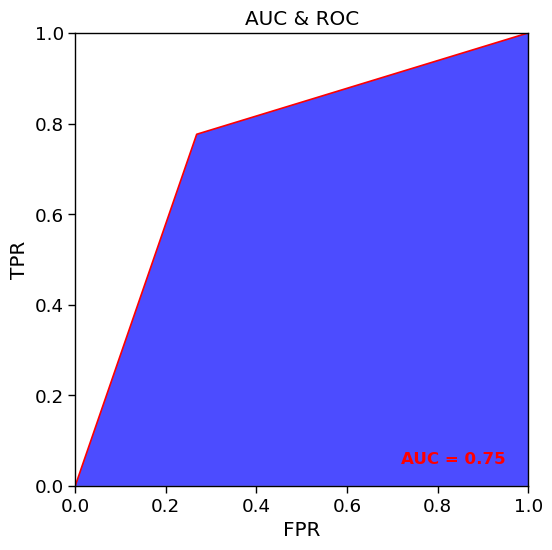

In [460]:
auc = metrics.roc_auc_score(y_test, logreg_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [443]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy for k= 19 is:',round(accuracy_score(knn_pred,y_test),2))

Accuracy for k= 19 is: 0.73


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

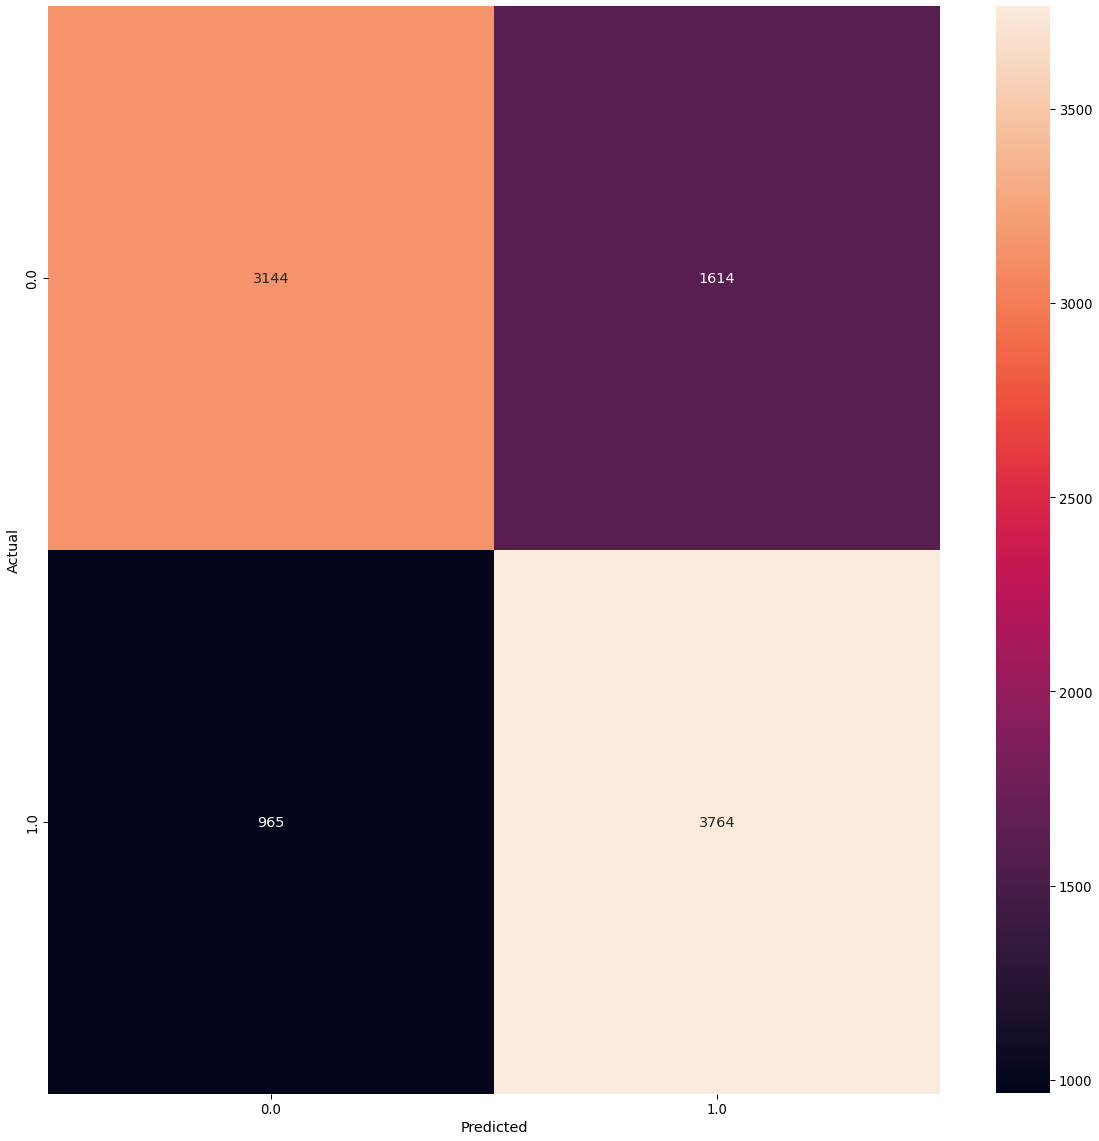

In [444]:
cm0 = pd.crosstab(y_test, knn_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm0, annot=True, fmt='g')

In [445]:
accknn = (knn.score(x_test, y_test))
print(f"Accuracy: {round(accknn,2)*100}%")
recallknn = recall_score(y_test, knn_pred)
print(f"Recall: {round(recallknn,2)*100}%")
precisionknn = precision_score(y_test, knn_pred)
print(f"Precision: {round(precisionknn,2)*100}%")
Specificityknn=recall_score(y_test, knn_pred, pos_label=0)
print(f"Specificity: {round(Specificityknn,2)*100}%")

Accuracy: 73.0%
Recall: 80.0%
Precision: 70.0%
Specificity: 66.0%


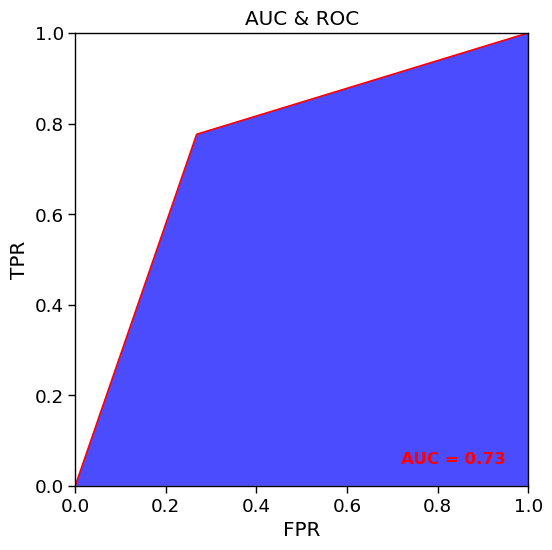

In [461]:
auc = metrics.roc_auc_score(y_test, knn_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [447]:
t0 = tree.DecisionTreeClassifier()  
t0.fit(x_train, y_train)
treepred0=t0.predict(x_test)
acc0 = accuracy_score(y_test, treepred0)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

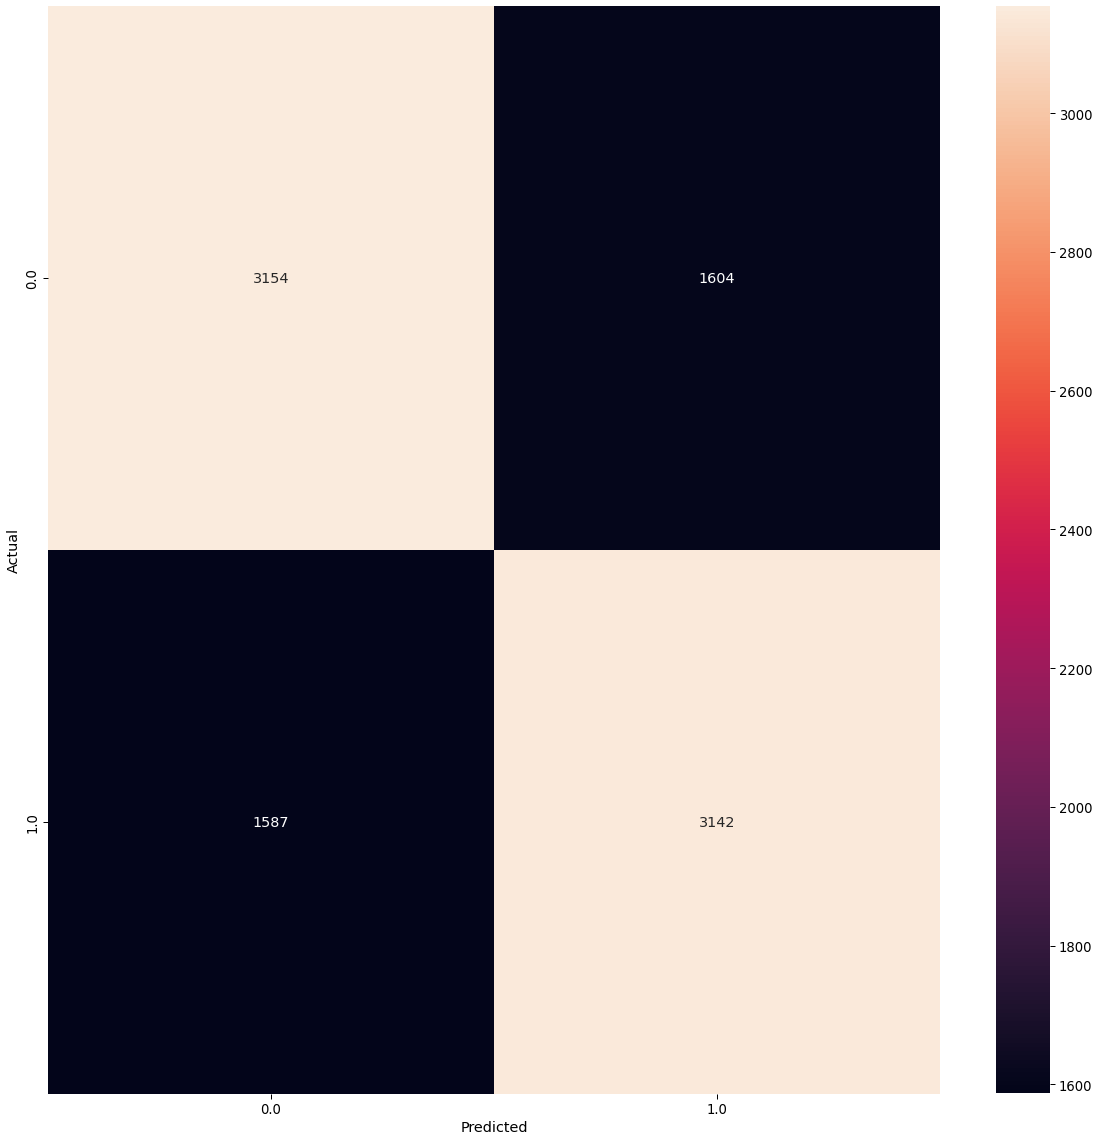

In [448]:
cm = pd.crosstab(y_test, treepred0, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [449]:
acct = (t0.score(x_test, y_test))
print(f"Accuracy: {round(acct,2)*100}%")
recallt = recall_score(y_test, treepred0)
print(f"Recall: {round(recallt,2)*100}%")
precisiont = precision_score(y_test, treepred0)
print(f"Precision: {round(precisiont,2)*100}%")
Specificityt=recall_score(y_test, treepred0, pos_label=0)
print(f"Specificity: {round(Specificityt,2)*100}%")

Accuracy: 66.0%
Recall: 66.0%
Precision: 66.0%
Specificity: 66.0%


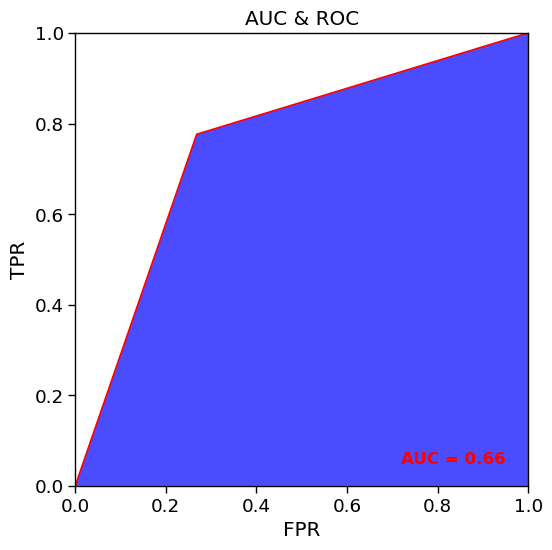

In [462]:
auc = metrics.roc_auc_score(y_test, treepred0)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [451]:
t2 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes=20, min_samples_leaf = 3, max_depth = 15)  
t2.fit(x_train, y_train)
treepred2=t2.predict(x_test)
acc2 = accuracy_score(y_test, treepred2)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

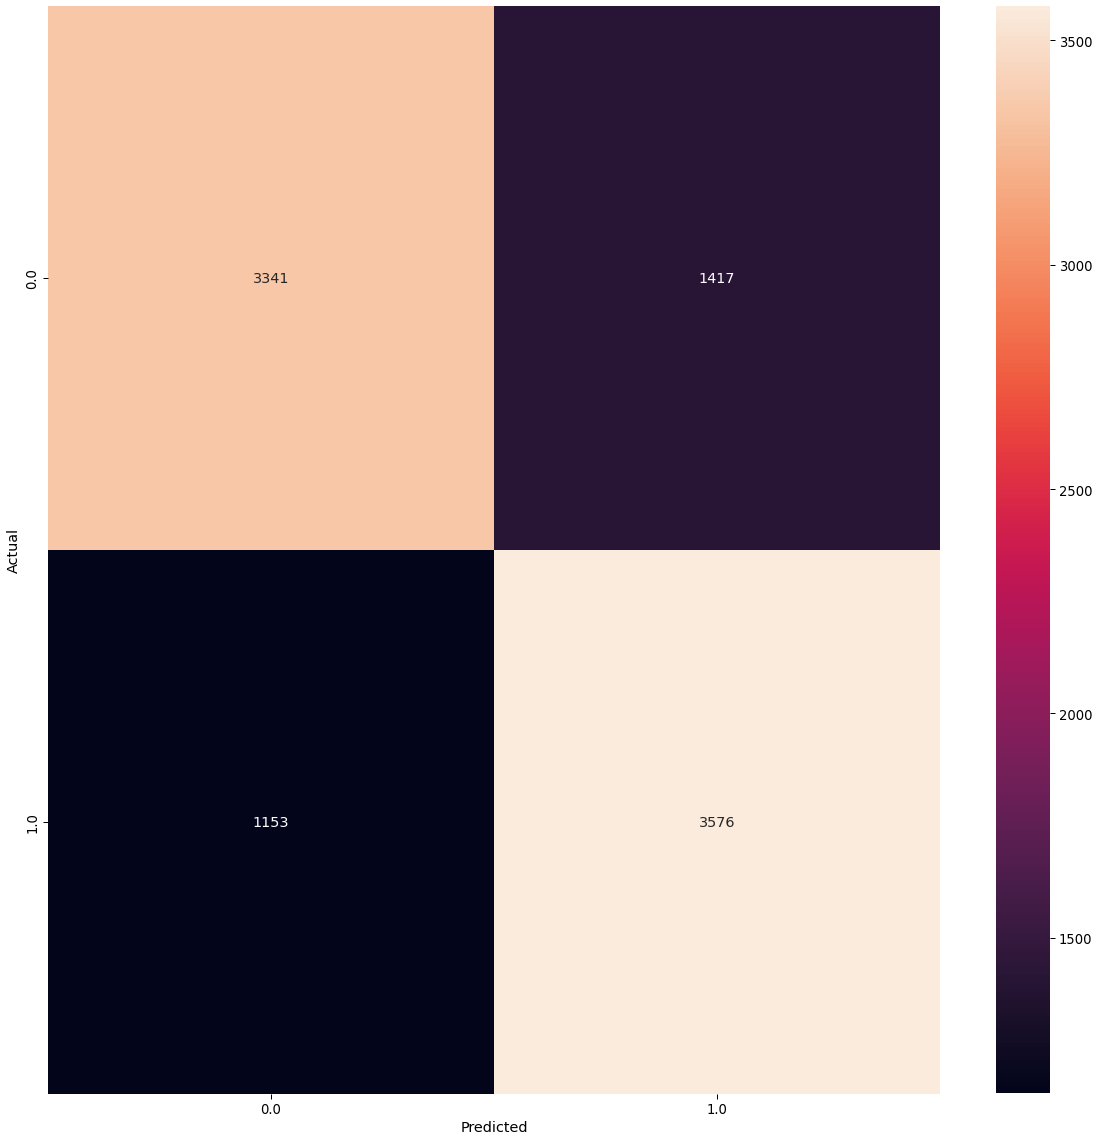

In [452]:
cm = pd.crosstab(y_test, treepred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [453]:
acctt = (t2.score(x_test, y_test))
print(f"Accuracy: {round(acctt,2)*100}%")
recalltt = recall_score(y_test, treepred2)
print(f"Recall: {round(recalltt,2)*100}%")
precisiontt = precision_score(y_test, treepred2)
print(f"Precision: {round(precisiontt,2)*100}%")
Specificitytt=recall_score(y_test, treepred2, pos_label=0)
print(f"Specificity: {round(Specificitytt,2)*100}%")

Accuracy: 73.0%
Recall: 76.0%
Precision: 72.0%
Specificity: 70.0%


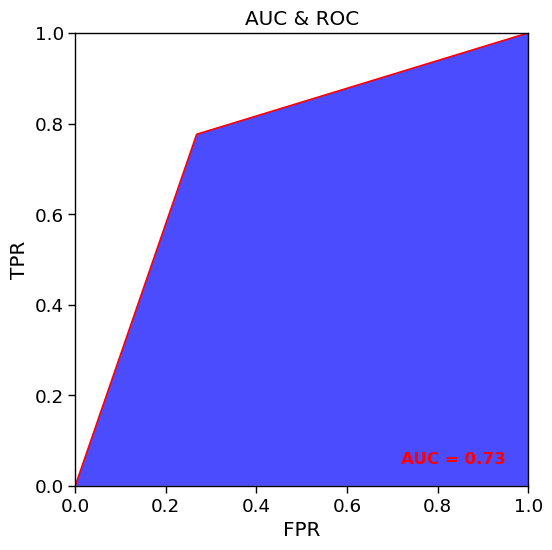

In [463]:
auc = metrics.roc_auc_score(y_test, treepred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [455]:
rf2=RandomForestClassifier(max_depth=100, min_samples_leaf=50, random_state=80)
rf2.fit(x_train, y_train)
p44=rf2.predict(x_test)
acc4 = accuracy_score(y_test, p44) 
print(f"Accuracy: {round(acc4, 2)}")

Accuracy: 0.76


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

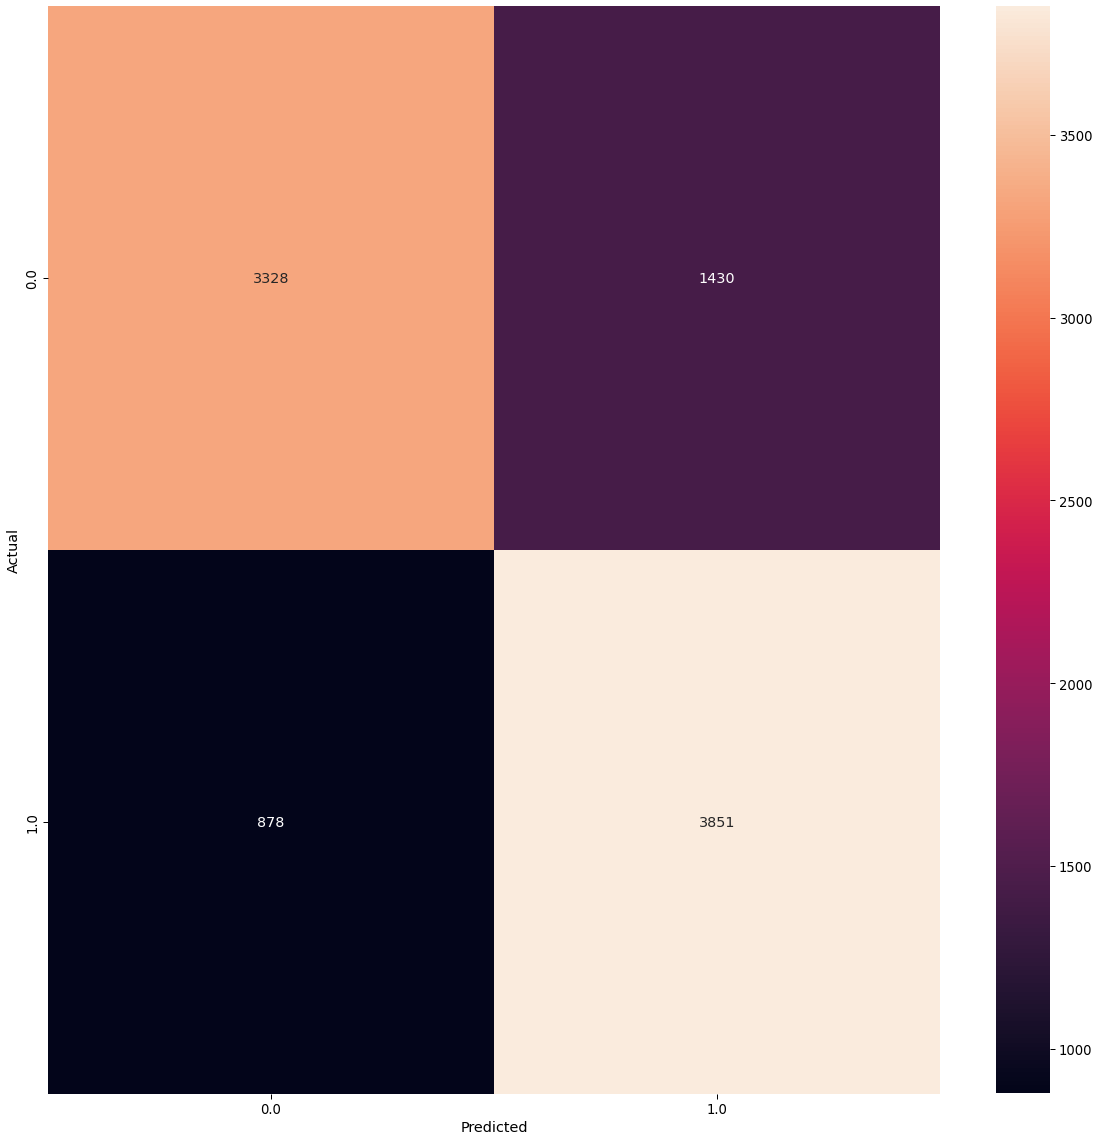

In [456]:
cm = pd.crosstab(y_test, p44, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='g')

In [457]:
accrf = (rf2.score(x_test, y_test))
print(f"Accuracy: {round(accrf,2)*100}%")
recallrf = recall_score(y_test, p44)
print(f"Recall: {round(recallrf,2)*100}%")
precisionrf = precision_score(y_test, p44)
print(f"Precision: {round(precisionrf,2)*100}%")
Specificityrf=recall_score(y_test, p44, pos_label=0)
print(f"Specificity: {round(Specificityrf,2)*100}%")

Accuracy: 76.0%
Recall: 81.0%
Precision: 73.0%
Specificity: 70.0%


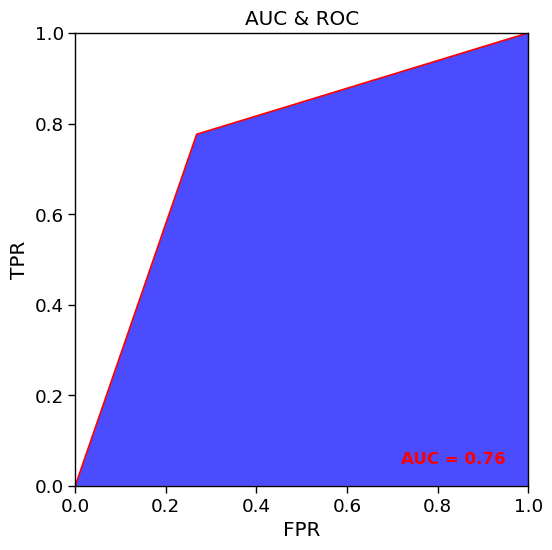

In [464]:
auc = metrics.roc_auc_score(y_test, p44)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logreg_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC")
plt.plot(false_positive_rate, true_positive_rate, 'r')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

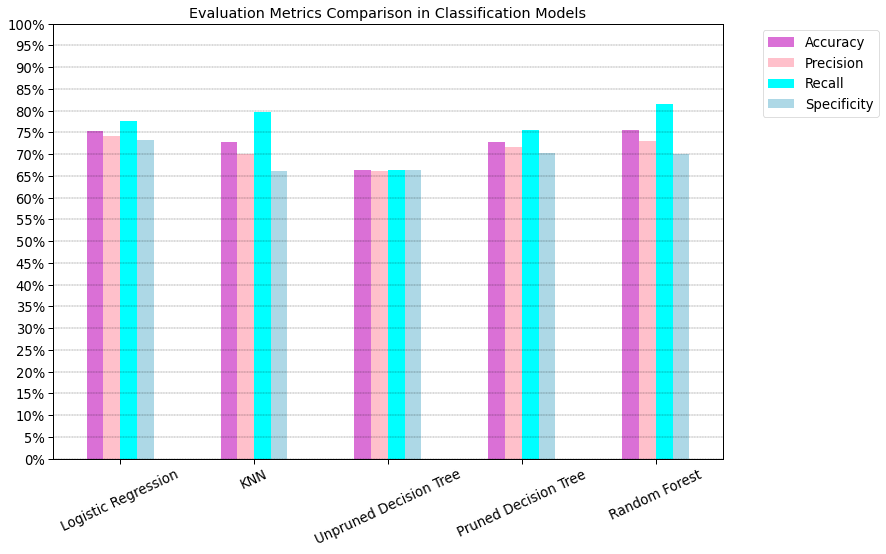

In [459]:
data={"Accuracy":[acclog,accknn, acct, acctt, accrf],
     "Precision":[precisionlog, precisionknn, precisiont, precisiontt, precisionrf],
     "Recall":[recalllog, recallknn, recallt, recalltt, recallrf],
     "Specificity":[Specificitylog, Specificityknn, Specificityt, Specificitytt, Specificityrf]};
index=["Logistic Regression","KNN", "Unpruned Decision Tree", "Pruned Decision Tree", "Random Forest"];
dataframe=pd.DataFrame(data=data,index=index);
dataframe.plot.bar(rot=25,title="Evaluation Metrics Comparison in Classification Models",
                   color=['orchid','pink','aqua','lightblue','silver'])
plt.yticks([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.8,0.85,0.9,0.95,1],
           ['0%', '5%', '10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%','65%','70%','75%',
            '80%','85%','90%','95%','100%'])
plt.grid(color = 'black', linestyle = '--', axis = 'y', linewidth = 0.3)
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

# We can conclude that all of the classifiers had similar performance but the Randmom Forest Classifier has the highest accuracy (76%), recall (81%), AUC value (0.76) which what we were aiming for, making it the best classifier in our case